In [222]:
from bokeh.plotting import figure, show, output_notebook
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE, MDS
import pandas as pd
from bokeh import palettes
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn
import json
from collections import OrderedDict

In [223]:
%matplotlib inline

In [224]:
keio_df = pd.read_csv("/Users/krisj/Documents/PhD/Projects/TnSeq/Data/Keio_cleaned.tsv", sep="\t", index_col=0)

In [152]:
keio_df.mean()

essential    0.070245
LB_22h       0.737337
MOPS_24h     0.305009
MOPS_48h     0.347315
dtype: float64

In [153]:
keio_df[keio_df["gene"] == "kgtP"]

gene essential  LB_22h  MOPS_24h  MOPS_48h
b_num                                            
b2587  kgtP     False    0.75     0.347     0.353

In [154]:
output_notebook()

Loading BokehJS ...

In [155]:
comp_conv = {
    "12PD": "1,2-propanediol",
    "23BD": "2,3-butanediol",
    "PUTR": "putrescine",
    "HMDA": "HMDA",
    "GLUT": "glutarate",
    "ADIP": "adipate",
    "HEXA": "hexanoate",
    "OCTA": "octanoate",
    "COUM": "coumarate",
    "IBUA": "isobutyrate",
    "BUT": "butanol"
}

inv_comp_conv = {v: k for k, v in comp_conv.items()}

with open("../Data/compound_shorthands.json", "w") as outfile:
    json.dump([comp_conv, inv_comp_conv], outfile)

In [156]:
with open("../Data/Mutation_data/Mutations_to_gene_names.json") as infile:
    muts_to_genes = json.load(infile)
    
with open("../Data/Mutation_data/Strain_to_genes.json") as infile:
    strains_to_genes = json.load(infile)
    strains_to_genes = {k: v for k, v in strains_to_genes.items() if not k.startswith("12PD")}
    
with open("../Data/Mutation_data/All_strains_to_mutations.json") as infile:
    strains_to_muts = json.load(infile)
    strains_to_muts = {k: v for k, v in strains_to_muts.items() if not k.startswith("12PD")}
        
muts_to_strains = {}
for s, muts in strains_to_muts.items():
    for mut in muts:
        muts_to_strains.setdefault(mut, []).append(s)

In [157]:
mut_df = pd.DataFrame(
    {s: {g: 1 for g in gs} for s, gs in strains_to_genes.items()}
).fillna(0).transpose()

In [158]:
"pyrE", "spoT", "manY", "proV"

('pyrE', 'spoT', 'manY', 'proV')

In [159]:
len(mut_df[(mut_df["rpoA"] == 1) | (mut_df["rpoB"] == 1) | (mut_df["rpoC"] == 1) | (mut_df["rpoS"] == 1)])

107

In [160]:
mut_df[mut_df["proV"]]

KeyError: '[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.\n  1.  0.  0.  0.  1.  1.  1.  0.  1.  1.  1.  0.  1.  0.  0.  0.  0.  0.\n  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.\n  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.\n  0.  0.  1.  0.  0.  1.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.\n  0.  0.  0.  0.  0.  1.  1.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.\n  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  1.  1.  0.  0.  0.  0.  0.\n  0.  0.  0.  0.  1.  1.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.\n  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.\n  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  1.  0.  1.  1.  1.  0.  0.  0.\n  1.  0.  1.  0.  0.  0.  0.  0.  0.] not in index'

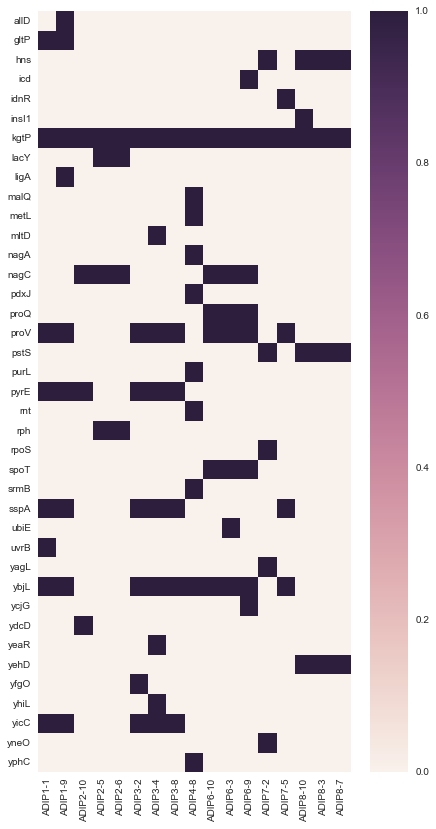

In [161]:
plot_df = mut_df[mut_df.index.str.startswith("ADIP")].transpose()
plot_df = plot_df[plot_df.sum(1) > 0]
plt.figure(figsize=[7, 14])
sbn.heatmap(plot_df)

In [162]:
mut_df[(mut_df["proV"] == 1) | (mut_df["proX"] == 1)]

aceK  acrB  adeP  allD  ampC  argG  arpA  atpI  barA  bglF  ...   \
ADIP1-1    0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...    
ADIP1-9    0.0   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0  ...    
ADIP3-2    0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...    
ADIP3-4    0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...    
ADIP3-8    0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...    
ADIP6-10   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...    
ADIP6-3    0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...    
ADIP6-9    0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...    
ADIP7-5    0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...    
GLUT1-10   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...    
GLUT2-1    0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...    
GLUT2-10   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...    
GLUT4-1    0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...    
GLUT4-4    0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...    
GLUT8-5    0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...    
GLUT8-6    0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...    
GLUT8-9    0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...    
HMDA1-10   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...    
HMDA2-1    0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...    
HMDA2-8    0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...    
HMDA8-10   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...    
HMDA8-5    0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...    
HMDA8-9    0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...    
PUTR3-1    0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...    
PUTR3-10   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...    
PUTR4-3    0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...    
PUTR4-7    0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...    
PUTR4-8    0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...    
PUTR6-10   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...    
PUTR6-7    0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...    
PUTR8-10   0.0   0.0   0.0   0.0   0.0   1.0   0.0   0.0   0.0   0.0  ...    
PUTR8-3    0.0   0.0   0.0   0.0   0.0   1.0   0.0   0.0   0.0   0.0  ...    
PUTR8-6    0.0   0.0   0.0   0.0   0.0   1.0   0.0   0.0   0.0   0.0  ...    

          yliE  ymfE  yneO  yobF  yphC  yphF  ypjA  ypjC  ytfR  zntR  
ADIP1-1    0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
ADIP1-9    0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
ADIP3-2    0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
ADIP3-4    0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
ADIP3-8    0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
ADIP6-10   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
ADIP6-3    0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
ADIP6-9    0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
ADIP7-5    0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
GLUT1-10   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
GLUT2-1    0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
GLUT2-10   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
GLUT4-1    0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
GLUT4-4    0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
GLUT8-5    0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
GLUT8-6    0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
GLUT8-9    0.0   1.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0  
HMDA1-10   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
HMDA2-1 

In [163]:
for m, gs in muts_to_genes.items():
    if "spoT" in gs:
        print(m)

DEL-3824201-6
DUP-3698818-150,236_2.5
SNP-3823105-A
SNP-3823759-C
SNP-3823139-A
SNP-3824507-C
SNP-3824137-T
SNP-3823799-T
SNP-3823861-T
SNP-3823700-T
DUP-3720632-103,691_2.2
SNP-3823724-T
SNP-3823025-A
SNP-3823799-A
SNP-3823770-T
SNP-3823106-T
SNP-3823751-T
SNP-3823751-A
SNP-3823036-C
DUP-3716033-114,694_1.9
SNP-3823664-C
DUP-3805381-43,673_2.7
SNP-3823811-A
SNP-3823987-T


In [164]:
mut_df.sum().sort_values(ascending=False)

rpoC    56.0
pyrE    55.0
kgtP    41.0
spoT    34.0
rpoB    31.0
manY    29.0
proV    28.0
rpoA    27.0
nagC    22.0
pykF    18.0
relA    17.0
rob     17.0
rho     16.0
yobF    16.0
metJ    16.0
marC    14.0
sspA    14.0
mdtK    13.0
cspC    12.0
mreB    12.0
hns     12.0
rpsA    11.0
sapB    11.0
nanK    11.0
ybjL    10.0
mprA     9.0
purT     9.0
rnb      9.0
rnt      9.0
rpsG     9.0
        ... 
pnp      1.0
pepA     1.0
pdxJ     1.0
otsB     1.0
opgH     1.0
ompN     1.0
rplM     1.0
rpsL     1.0
tyrB     1.0
rrlA     1.0
tufA     1.0
tqsA     1.0
tomB     1.0
tolA     1.0
thrA     1.0
tdcD     1.0
tdcA     1.0
ssuA     1.0
srmB     1.0
speA     1.0
sfmH     1.0
sfmF     1.0
sdaC     1.0
rspA     1.0
rsmC     1.0
rsfS     1.0
rsd      1.0
rrsA     1.0
rrlC     1.0
aceK     1.0
dtype: float64

In [165]:
[m for m in muts_to_genes if "rpoA" in muts_to_genes[m]]

['INS-3440937-CGCTCT',
 'SNP-3440923-T',
 'SNP-3440068-T',
 'SNP-3440924-G',
 'SNP-3440194-A',
 'SNP-3440116-C',
 'SNP-3440929-A',
 'SNP-3440822-C',
 'SNP-3440212-A',
 'SNP-3440212-C',
 'DUP-3431072-47,944_1.9',
 'SNP-3440378-T']

In [166]:
all_muts = set.union(*[set(strains_to_muts[s]) for s in strains_to_genes])

In [167]:
len([m for m in all_muts if not (m.split("-")[0] == "DEL" and int(m.split("-")[-1]) > 1000)])

901

In [168]:
len(set.union(*map(set, strains_to_genes.values())))

268

In [169]:
for s in strains_to_genes:
    if s.startswith("IBUA") and "pykF" not in strains_to_genes[s]:
        print(s, strains_to_genes[s])

IBUA2-1 ['bglF', 'yijD', 'ydhZ', 'rpoC', 'sapD', 'rpsC', 'yobF']
IBUA2-9 ['bglF', 'yijD', 'ydhZ', 'rpoC', 'sapD', 'rpsC', 'yobF']
IBUA2-6 ['bglF', 'yijD', 'ydhZ', 'rpoC', 'sapD', 'rpsC', 'yobF']


In [85]:
muts_to_genes["SNP-1494068-G"]

['trg']

In [86]:
muts_to_strains["SNP-1494068-G"]

['OCTA6-5', 'OCTA6-7']

In [90]:
"OCTA6-7" in strains_to_genes

False

In [84]:
with open("../../Data/Mutations/Mutation_effects.json") as infile:
    mutation_effects = json.load(infile)

In [85]:
mutation_effects['SNP-3815823-A']

['SNP', 'intergenic']

In [189]:
for mut, effect in mutation_effects.items():
    if effect[1] == "noncoding":
        print(mut, effect)

SNP-2058079-C ['SNP', 'noncoding']
INS-3982684-C ['INS', 'noncoding']
INS-4606215-G ['INS', 'noncoding']
SNP-2730879-C ['SNP', 'noncoding']
SNP-781084-C ['SNP', 'noncoding']
INS-4362600-C ['INS', 'noncoding']
DEL-4606094-1 ['DEL', 'noncoding']
INS-4606330-G ['INS', 'noncoding']
SNP-4606331-G ['SNP', 'noncoding']
DEL-4606330-1 ['DEL', 'noncoding']
SNP-4037067-C ['SNP', 'noncoding']
DEL-3943892-1 ['DEL', 'noncoding']
DEL-4606215-1 ['DEL', 'noncoding']


In [190]:
synonymous = []
missense = []
nonsense = []
non_coding = []

deletions = []
insertions = []
duplications = []
mobs = []
substitutions = []
for mut in all_muts:
    typ, effect = mutation_effects[mut]
    if typ == "SNP":
        if effect in ["intergenic", "pseudogene", "noncoding"]:
            non_coding.append(mut)
        else:
            pre, num, post = effect[0], effect[1: -1], effect[-1]
            int(num)
            if pre == post:
                synonymous.append(mut)
            elif post == "*":
                nonsense.append(mut)
            else:
                missense.append(mut)
                
    elif typ == "DEL":
        deletions.append(mut)
    elif typ == "INS":
        insertions.append(mut)
    elif typ == "DUP":
        duplications.append(mut)
    elif typ == "MOB":
        mobs.append(mut)
    elif typ == "SUB":
        substitutions.append(mut)
    else:
        raise ValueError(mut)
                
print("Synonymous:", len(synonymous))
print("Missense:", len(missense))
print("Nonsense:", len(nonsense))
print("Non-coding:", len(non_coding))
print("")
print("Total SNP's:", len(synonymous) + len(missense) + len(nonsense) + len(non_coding))
print("")
print("")
print("Deletions:", len(deletions))
print("Insertions:", len(insertions))
print("Duplications:", len(duplications))
print("Substitutions:", len(substitutions))
print("Mobile elements:", len(mobs))

Synonymous: 20
Missense: 209
Nonsense: 22
Non-coding: 41

Total SNP's: 292


Deletions: 87
Insertions: 34
Duplications: 414
Substitutions: 1
Mobile elements: 82


In [201]:
for comp in comp_order:
    comp_muts = set.union(*map(set, [strains_to_muts[s] for s in strains_to_genes if s.startswith(comp)]))
    print(comp, sum([1 for m in comp_muts if m in synonymous]), len([m for m in comp_muts if mutation_effects[m][0] == "SNP"]))

HMDA 0 26
PUTR 3 45
23BD 1 37
GLUT 8 53
ADIP 4 29
HEXA 2 21
OCTA 1 17
IBUA 0 34
COUM 1 28
BUT 0 15


In [216]:
glut_muts = set.union(*map(set, [strains_to_muts[s] for s in strains_to_genes if s.startswith("GLUT")]))
glut_muts = {m for m in glut_muts if m in synonymous}

In [225]:
list(map(muts_to_genes.get, synonymous))

[['rpoC'],
 ['roxA'],
 ['prpE'],
 ['argG'],
 ['yfcZ'],
 ['aceK'],
 ['pdxJ'],
 ['yfgO'],
 ['hofM'],
 ['rclB'],
 ['fruB'],
 ['yagL'],
 ['gtrS'],
 ['rhaT'],
 ['emrY'],
 ['ytfR'],
 ['ssuA'],
 ['icd'],
 ['yliE'],
 ['ytfR']]

In [223]:
synonymous

['SNP-4186186-C',
 'SNP-1187352-A',
 'SNP-353944-A',
 'SNP-3318960-A',
 'SNP-2460805-A',
 'SNP-4219696-T',
 'SNP-2701175-C',
 'SNP-2614996-G',
 'SNP-3522182-A',
 'SNP-318484-T',
 'SNP-2262665-A',
 'SNP-293574-G',
 'SNP-2470411-G',
 'SNP-4099695-A',
 'SNP-2481325-A',
 'SNP-4451123-A',
 'SNP-996768-A',
 'SNP-1196319-A',
 'SNP-874067-A',
 'SNP-4452005-A']

In [77]:
len(all_muts)

910

In [11]:
len([s for s in set(muts_to_strains["DEL-3815808-1"]) | set(muts_to_strains["DEL-3815810-1"]) if s in strains_to_genes])

50

In [12]:
for mut in sorted(muts_to_strains, key=lambda x: len(set([s[:3] for s in muts_to_strains[x]])), reverse=True):
    print(mut, (set([s[:3] for s in muts_to_strains[mut]])))

DEL-3815810-1 {'23B', 'COU', 'ADI', 'BUT', 'HMD'}
DEL-3815808-1 {'PUT', 'IBU', 'OCT', 'HMD'}
DEL-2804864-13 {'GLU', 'PUT', 'ADI', 'HMD'}
DEL-3815859-82 {'BUT', 'PUT', 'IBU', 'HMD'}
MOB-1907448-IS5-4 {'GLU', 'PUT', 'BUT', 'IBU'}
SNP-4185540-T {'HEX', 'COU', 'GLU'}
MOB-1293196-IS5-4 {'HEX', 'COU', 'OCT'}
MOB-1879829-Δ1-: {'23B', 'PUT', 'ADI'}
SNP-4186605-C {'GLU', 'OCT'}
SNP-4257602-T {'PUT', 'HMD'}
INS-1212088-C {'23B', 'OCT'}
SNP-4128316-G {'23B', 'OCT'}
INS-380022-G {'23B', 'HMD'}
MOB-2798597-IS1-9 {'PUT', 'HMD'}
INS-1198505-AATGATGA {'GLU', 'OCT'}
SNP-3816611-A {'PUT', 'HMD'}
DEL-2804835-7 {'ADI', 'HMD'}
MOB-2678755-IS5-4 {'COU', 'PUT'}
SNP-64352-C {'COU', 'GLU'}
SNP-1354687-A {'HEX', 'OCT'}
SNP-1354284-A {'COU', 'GLU'}
INS-1351196-G {'23B', 'OCT'}
DEL-2725643-1 {'GLU', 'ADI'}
SNP-1352163-A {'COU', 'IBU'}
SNP-3823025-A {'PUT', 'HMD'}
SNP-3473612-C {'PUT', 'HMD'}
SNP-3440923-T {'HEX', 'OCT'}
SNP-1903497-C {'COU', 'BUT'}
DUP-3583468-703_4.2 {'HMD'}
DUP-3219652-3,061_1.7 {'COU'}
DEL-353

In [13]:
for mut in muts_to_genes:
    if "pyrE" in muts_to_genes[mut]:
        print(mut)
        try:
            print(muts_to_strains[mut])
        except KeyError:
            pass
        print("")

DUP-3698818-150,236_2.5
['HEXA2-9']

DUP-3720632-103,691_2.2

SNP-3815521-G

DEL-3815808-1
['OCTA6-5', 'HMDA2-8', 'OCTA7-9', 'HMDA2-1', 'HMDA8-9', 'HMDA8-10', 'IBUA6-7', 'PUTR8-10', 'PUTR8-3', 'OCTA7-10', 'OCTA7-2', 'OCTA6-6', 'HMDA8-5', 'PUTR8-6', 'OCTA6-7']

DUP-3805381-43,673_2.7
['HEXA2-3']

SNP-3815823-A
['ADIP1-9', 'ADIP3-4', 'ADIP3-2', 'ADIP1-1', 'ADIP3-8']

DUP-3716033-114,694_1.9
['COUM2-3']

DEL-3815810-1
['COUM3-9', 'BUT7-6', 'BUT6-3', 'BUT9-10', '23BD8-2', 'COUM6-9', 'HMDA3-6', 'BUT9-7', 'HMDA5-5', 'BUT7-9', 'HMDA5-10', 'BUT3-6', 'BUT5-3', 'COUM6-2', 'BUT4-4', 'BUT3-3', 'ADIP2-10', 'BUT1-3', 'HMDA5-4', 'COUM3-1', 'HMDA3-4', 'BUT1-2', 'BUT4-7', '23BD8-7', 'COUM8-6', 'COUM7-6', 'BUT3-7', 'BUT6-1', 'COUM6-5', 'BUT1-5', 'COUM7-5', 'BUT4-9', 'BUT7-7', 'HMDA3-5', 'COUM8-1', 'BUT5-2', 'BUT6-8', 'COUM3-10']



In [14]:
compound_strain_mutation_counts = {}
for s, muts in strains_to_muts.items():
    if s not in strains_to_genes:
        continue
    comp = s.split("-")[0][:-1]
    if len(muts) > 100:
        continue
    compound_strain_mutation_counts.setdefault(comp, []).append(len(muts))

In [15]:
compound_strain_mutation_counts

{'23BD': [28, 48, 8, 8, 8, 10, 4, 8, 37, 6, 10, 7, 6, 7, 10, 4, 8],
 'ADIP': [11, 7, 9, 6, 6, 6, 6, 5, 7, 9, 10, 6, 7, 8, 8, 5, 6],
 'BUT': [5, 5, 6, 5, 5, 6, 6, 8, 5, 5, 6, 4, 7, 6, 5, 6, 6, 5, 8, 5],
 'COUM': [8, 56, 9, 6, 7, 9, 6, 9, 9, 9, 5, 7, 9, 9, 8, 7, 6, 6, 8],
 'GLUT': [8,
  6,
  5,
  6,
  7,
  5,
  7,
  6,
  8,
  3,
  5,
  6,
  6,
  4,
  24,
  4,
  5,
  6,
  5,
  5,
  6,
  4,
  3,
  8],
 'HEXA': [10, 4, 5, 8, 5, 6, 7, 4, 8, 4, 3, 5, 5, 3, 6, 6, 6, 5, 8, 5],
 'HMDA': [6, 5, 6, 5, 5, 7, 6, 7, 7, 3, 4, 4, 8, 8, 4],
 'IBUA': [5, 13, 17, 19, 7, 7, 4, 7, 13, 7, 4, 6, 6, 6, 16, 5, 3, 11, 5],
 'OCTA': [3, 4, 6, 6, 6, 3, 3, 5, 3, 3, 4, 5, 5, 5, 3, 4, 4],
 'PUTR': [5, 13, 4, 3, 3, 7, 8, 2, 4, 5, 5, 8, 9, 7, 10, 8, 3, 9, 10, 10]}

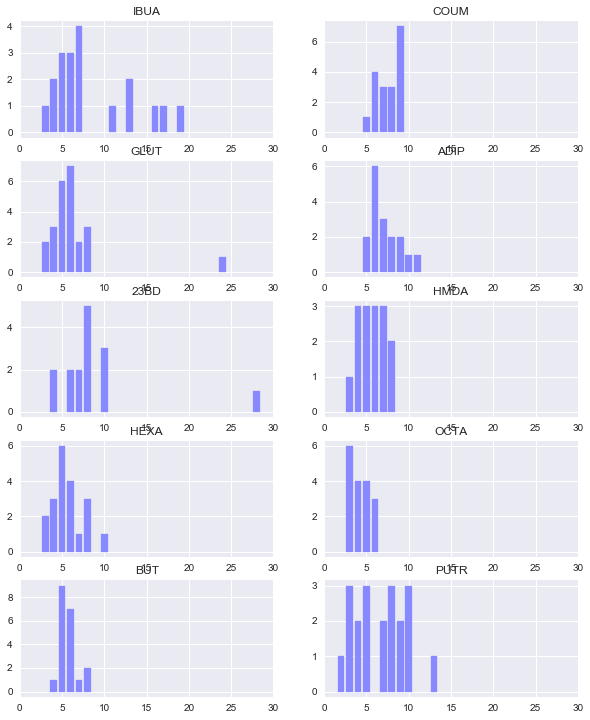

In [16]:
fig = plt.figure(figsize=[10, 15])

# plt.tight_layout()
for i, (comp, li) in enumerate(compound_strain_mutation_counts.items()):
    ax = fig.add_subplot(len(compound_strain_mutation_counts)//2 + 1, 2, i+1)
    hist, bin_edges = np.histogram(li, bins=30, range=(-0.5, 29.5))
    delta = bin_edges[1] - bin_edges[0]
    spacing = 0.1
    for i in range(len(hist)):
        if hist[i] == 0:
            continue
        ax.fill_between(
            [bin_edges[i] + spacing * delta, bin_edges[i+1] - spacing * delta],
            [0, 0],
            [hist[i], hist[i]],
            color="#8888ff"
        )
    plt.title(comp)
    plt.xlim([0, 30])

In [148]:
comp_order = ["HMDA", "PUTR", "23BD", "GLUT", "ADIP", "HEXA", "OCTA", "IBUA", "COUM", "BUT"]
dat = [{"compound": c, "num": a} for c in comp_order for a in compound_strain_mutation_counts[c]]
mut_num_df = pd.DataFrame(dat)

NameError: name 'compound_strain_mutation_counts' is not defined

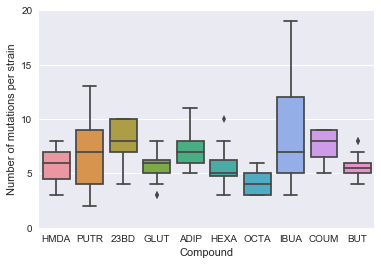

In [18]:
sbn.boxplot(x="compound", y="num", data=mut_num_df)
plt.ylim([0, 20])
plt.ylabel("Number of mutations per strain")
plt.yticks([0, 5, 10, 15, 20])
plt.xlabel("Compound")
plt.savefig("../../Plots/Draft_plots/Mutation_boxplot.png")

In [19]:
mut_typ_order = ("SNP", "DEL", "DUP", "MOB", "INS", "SUB")

def count_strain_mutations(s):
    muts = strains_to_muts[s]
    counts = OrderedDict()
    for typ in mut_typ_order:
        counts[typ] = 0
    for mut in muts:
        typ = mut.split("-")[0]
        counts[typ] += 1
    return counts

In [20]:
mut_typ_order = ("SNP", "INDEL", "DUP", "MOB")

def count_strain_mutations(s):
    muts = strains_to_muts[s]
    counts = OrderedDict()
    for typ in mut_typ_order:
        counts[typ] = 0
    for mut in muts:
        typ = mut.split("-")[0]
        if typ in ("INS", "DEL", "SUB"):
            typ = "INDEL"
        counts[typ] += 1
    return counts

In [21]:
strain_order = sorted(
    strains_to_genes,
    key=lambda x: (comp_order.index(x.split("-")[0][:-1]), x.split("-")[0][-1], int(x.split("-")[-1]))
)

strain_order = sorted(
    strains_to_genes,
    key=lambda x: (comp_order.index(x.split("-")[0][:-1]), list(count_strain_mutations(x).values()))
)

strain_order = [s for s in strain_order if len(strains_to_muts[s]) < 2000]

# strain_order = []
# for comp in comp_order:
#     comp_strains = [s for s in strains_to_genes if s.startswith(comp) and len(strains_to_muts[s]) < 20]
#     strain_muts = pd.DataFrame({s: count_strain_mutations(s) for s in comp_strains}).transpose()
#     mds = MDS(1)
#     coords = mds.fit_transform(strain_muts)[:, 0]
#     coord_dict = dict(zip(comp_strains, coords))
#     sorted_comp_strains = sorted(comp_strains, key=coord_dict.get)
#     strain_order.extend(sorted_comp_strains)

SNP set()
INDEL {'SNP'}
DUP {'INDEL', 'SNP'}
MOB {'INDEL', 'DUP', 'SNP'}


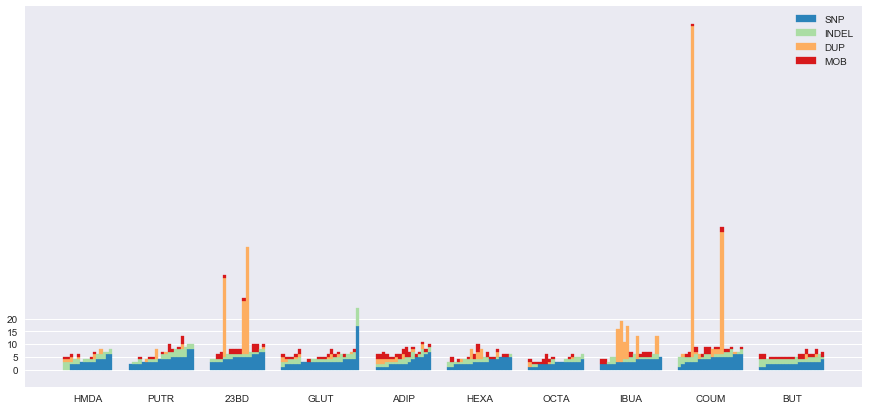

In [22]:
palette = palettes.Spectral4

ticks = []
tick_labels = []

colors = dict(zip(mut_typ_order, palette))
#colors = {"SNP": palette[0], "DEL": palette[1], "DUP": palette[5], "MOB": palette[3], "INS": palette[4], "SUB": palette[2]}


labels = set()
fig = plt.figure(figsize=[15, 7])
comp = None

i = -1
for s in strain_order:
    i += 1
    new_comp = s.split("-")[0][:-1]
    
    if new_comp != comp:
        if comp is not None:
            #plt.plot([i-0.5, i-0.5], [0, 20], "k")
            i += 5
        comp = new_comp
        ticks.append(i + len([s for s in strain_order if s.startswith(comp)]) / 2)
        tick_labels.append(comp)
        
    muts = count_strain_mutations(s)
    j = 0
    for typ in mut_typ_order:

        if typ in labels:
            label = None
        else:
            label = typ
            print(typ, labels)
            plt.fill_between([0, 0], [0, 0], [0, 0], color=colors[typ], label=label)
            labels.add(typ)
            
        num = muts[typ]
        if num == 0:
            continue
            
        
        # plt.plot([i, i], [j, j + muts[typ]], color=colors[typ], linewidth=4, label=label)
        plt.fill_between([i, i+1], [j, j], [j + num, j + num], color=colors[typ])
        j += num
        
plt.legend()
plt.xticks(ticks, tick_labels)
plt.grid(axis="x")
plt.yticks([0, 5, 10, 15, 20])
None

plt.savefig("../../Plots/Draft_plots/Mutation_types_stacked_bars.png")

In [23]:
def count_duplications(s):
    muts = strains_to_muts[s]
    count = 0
    for mut in muts:
        if mut.startswith("DUP"):
            t, pos, last = mut.split("-")
            length = int("".join(last.split("_")[0].split(",")))
            count += length
    return count

(0, 30)

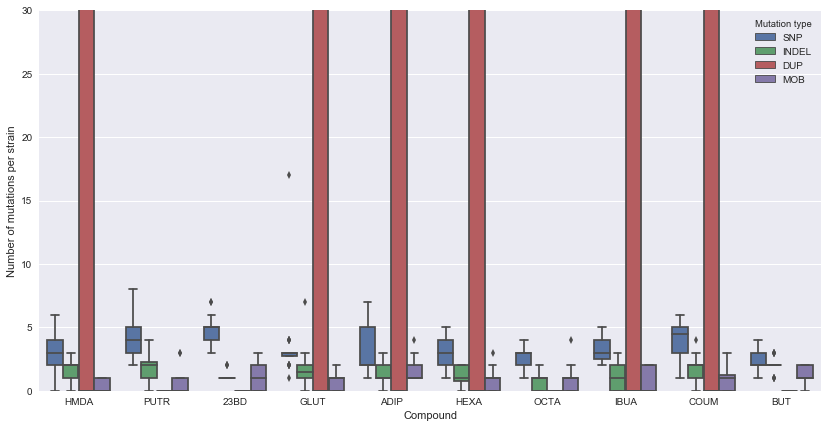

In [24]:
dat = []

plt.figure(figsize=[14, 7])
for strain in strain_order:
    comp = strain.split("-")[0][:-1]
    counts = count_strain_mutations(strain)
    for typ, c in counts.items():
        if typ == "DUP":
            c = count_duplications(strain)
        dat.append({
            "Compound": comp,
            "Mutation type": typ,
            "strain": strain,
            "num": c,
            "dupl": "Duplication" if typ == "DUP" else "Other mutation"
        })
        
plot_df = pd.DataFrame(dat)

sbn.boxplot(hue="Mutation type", y="num", x="Compound", data=plot_df)
plt.ylabel("Number of mutations per strain")
plt.ylim([0, 30])

# plt.savefig("../../Plots/Draft_plots/Mutations_per_strain_per_type.png")

In [25]:
test_dict = {s: len([m for m in muts if m.startswith("DUP")]) for s, muts in strains_to_muts.items() if s in strains_to_genes}
test_dict = {k: v for k, v in test_dict.items() if v > 4}
test_dict

{'23BD4-4': 31,
 '23BD5-1': 21,
 '23BD8-2': 42,
 'COUM2-3': 130,
 'COUM6-9': 48,
 'IBUA4-1': 7,
 'IBUA4-9': 7,
 'IBUA5-2': 9,
 'IBUA5-6': 13,
 'IBUA7-6': 13,
 'IBUA7-9': 16}

In [26]:
{k: strains_to_genes[k] for k in test_dict}

{'23BD4-4': ['yeaR', 'relA', 'rpoC', 'purT', 'hlyE', 'metJ'],
 '23BD5-1': ['spoT', 'yeaR', 'relA', 'hlyE', 'purT', 'rpoC', 'metJ'],
 '23BD8-2': ['pyrE', 'ygaH', 'iscR', 'rpoB', 'relA', 'lon'],
 'COUM2-3': ['atpI', 'nadR', 'rho', 'murC', 'rpoC', 'sapF'],
 'COUM6-9': ['pyrE', 'rho', 'yjiP', 'yhgE', 'manY', 'nusA', 'fimC', 'rnb'],
 'IBUA4-1': ['yjjQ', 'pykF', 'sapB', 'rpoB'],
 'IBUA4-9': ['speA', 'infA', 'yaiP', 'pykF', 'rpoB', 'bglG'],
 'IBUA5-2': ['rpoS', 'prfA', 'pykF', 'rpoB'],
 'IBUA5-6': ['rpoS', 'prfA', 'pykF', 'rpoB'],
 'IBUA7-6': ['sapC', 'pykF', 'rpoB'],
 'IBUA7-9': ['gadE', 'sapC', 'pykF', 'rpoB']}

In [27]:
sorted(strains_to_muts["COUM2-3"])

['DEL-102228-1',
 'DEL-4627451-124',
 'DUP-19809-729_2.9',
 'DUP-2153522-495_1.7',
 'DUP-2203757-661_1.7',
 'DUP-2230567-641_1.7',
 'DUP-2248846-2,310_1.6',
 'DUP-2277221-1,144_1.6',
 'DUP-2283904-3,650_1.6',
 'DUP-2302677-506_1.7',
 'DUP-2315725-3,010_1.6',
 'DUP-2349564-2,134_1.7',
 'DUP-2364669-1,268_1.6',
 'DUP-2380840-4,088_1.6',
 'DUP-2388349-1,482_1.7',
 'DUP-2412283-1,358_1.7',
 'DUP-2423083-5,019_1.6',
 'DUP-2449738-1,755_1.6',
 'DUP-2455198-1,948_1.7',
 'DUP-2468962-2,419_1.7',
 'DUP-2482796-1,718_1.7',
 'DUP-2511325-1,646_1.5',
 'DUP-2517129-1,717_1.6',
 'DUP-2522064-2,238_1.7',
 'DUP-2526701-3,679_1.7',
 'DUP-2531397-3,184_1.7',
 'DUP-2536626-1,568_1.7',
 'DUP-2543740-1,467_1.6',
 'DUP-2546395-4,100_1.6',
 'DUP-2551832-4,375_1.7',
 'DUP-2558674-1,785_1.6',
 'DUP-2561394-4,675_1.7',
 'DUP-2580826-2,602_1.6',
 'DUP-2598979-2,717_1.7',
 'DUP-2603627-1,553_1.6',
 'DUP-2615290-3,271_1.6',
 'DUP-2619810-2,231_1.7',
 'DUP-2623513-3,200_1.6',
 'DUP-2629215-3,295_1.8',
 'DUP-2658050

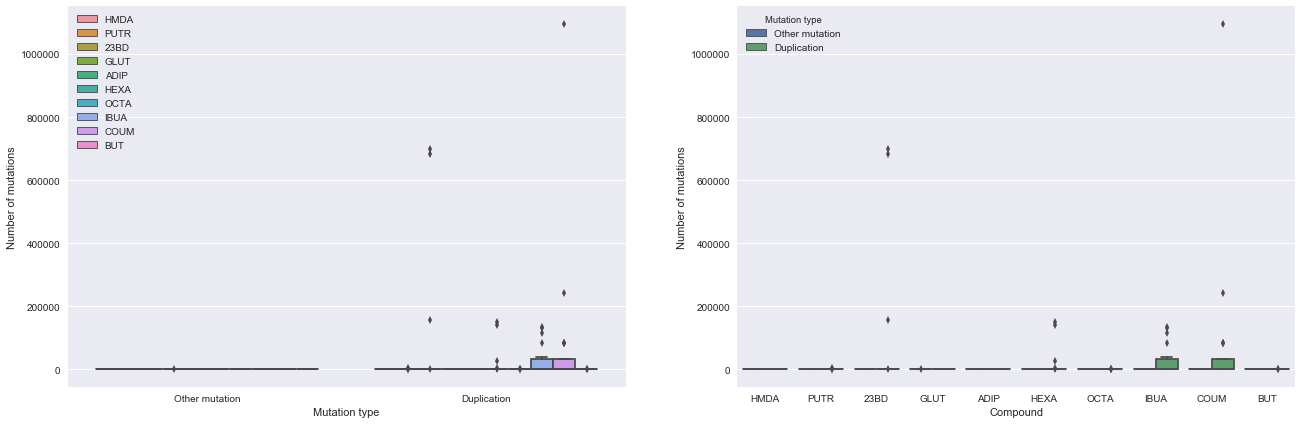

In [28]:
alt_plot_df = plot_df.groupby(["Compound", "strain", "dupl"]).sum().reset_index()
alt_plot_df["Compound"] = pd.CategoricalIndex(alt_plot_df["Compound"], comp_order)
alt_plot_df["Mutation type"] = alt_plot_df["dupl"]
alt_plot_df = alt_plot_df.sort_values("Compound")

plt.figure(figsize=[22, 7])

plt.subplot(1, 2, 1)
sbn.boxplot(x="Mutation type", y="num", hue="Compound", data=alt_plot_df)
plt.ylabel("Number of mutations")
plt.legend()

plt.subplot(1, 2, 2)
sbn.boxplot(x="Compound", y="num", hue="Mutation type", data=alt_plot_df)
plt.ylabel("Number of mutations")


plt.savefig("../../Plots/Draft_plots/Duplications_and_non-duplications_per_compound.png")

23BD 699296
23BD 682156
GLUT 24
COUM 1096364


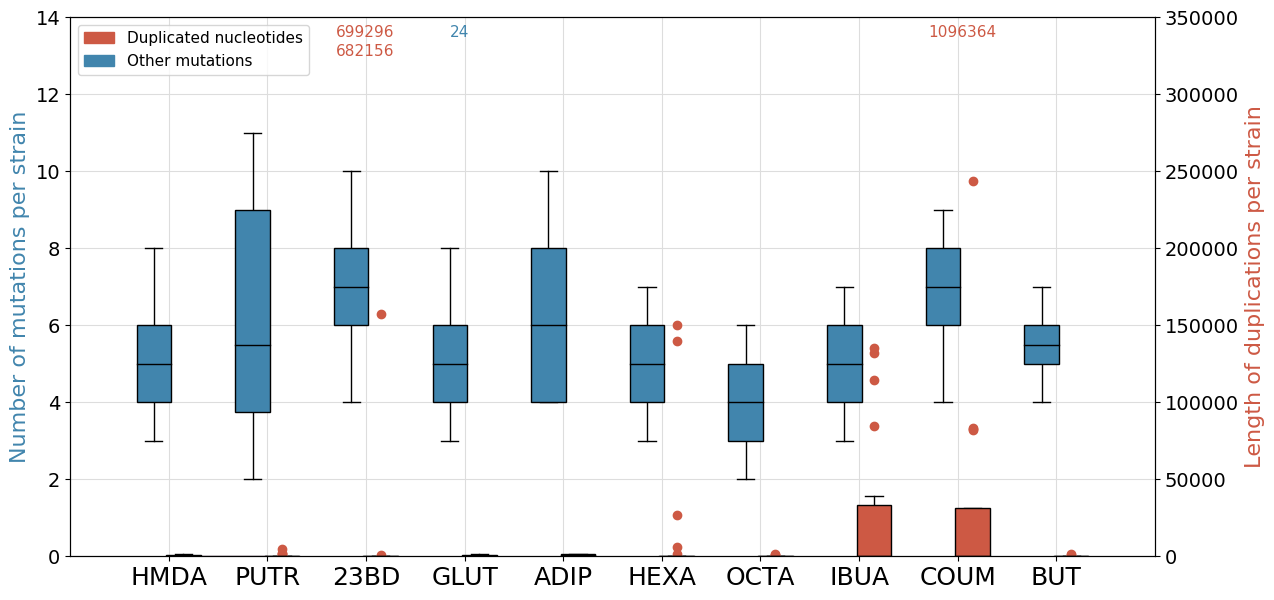

In [29]:
colors = ["#4185AD", "#CD5944"]

max_muts = 14
max_dups = 50000/2*14

plt.style.use("default")
fig = plt.figure(figsize=[14, 7])

plt.yticks(fontsize=14)

ax1 = fig.add_subplot(1, 1, 1)
ax2 = ax1.twinx()
for i, comp in enumerate(comp_order):
    comp_df = alt_plot_df[alt_plot_df["Compound"] == comp]
    mut_df = comp_df[comp_df["Mutation type"] == "Other mutation"]
    dup_df = comp_df[comp_df["Mutation type"] == "Duplication"]
    
    widths = [0.35]
    offset = 0.15
    
    box1 = ax1.boxplot(mut_df["num"].values, positions=[i - offset], patch_artist=True, sym="w", widths=widths)
    box2 = ax2.boxplot(dup_df["num"].values, positions=[i + offset], patch_artist=True, sym="w", widths=widths)
    
    outliers1 = box1["fliers"][0].get_data()
    outliers2 = box2["fliers"][0].get_data()
    
    for num in outliers1[1]:
        if num > max_muts:
            print(comp, num)
            ax1.text(i - offset, max_muts - 0.5, num, color=colors[0], fontsize=11)
    j = 1
    for num in outliers2[1]:
        if num > max_dups:
            print(comp, num)
            ax2.text(i - 0.3, max_dups - j * 50000/2*0.5, num, color=colors[1], fontsize=11)
            j += 1
    
    ax2.plot(outliers2[0], outliers2[1], "o", color=colors[1])
    ax1.plot(outliers1[0], outliers1[1], "o", color=colors[0])
    
    box1["boxes"][0].set_facecolor(colors[0])
    box2["boxes"][0].set_facecolor(colors[1])
    
    box1["medians"][0].set_color("black")
    box2["medians"][0].set_color("black")

ax1.set_xlim(-1, 10)
ax1.set_xticks(range(len(comp_order)))
ax1.set_xticklabels(comp_order, fontsize=18)
ax1.grid(axis="both", color="#dddddd")

plt.yticks(fontsize=14)

ax1.set_ylim(0, max_muts)
ax2.set_ylim(0, max_dups)

# Dummy drawings for legend labels
plt.fill_between([0, 1], [-2, -2], [-1, -1], color=colors[1], label="Duplicated nucleotides")
plt.fill_between([0, 1], [-2, -2], [-1, -1], color=colors[0], label="Other mutations")

plt.legend(fontsize=11)

ax1.set_ylabel("Number of mutations per strain", fontsize=16, color=colors[0])
ax2.set_ylabel("Length of duplications per strain", fontsize=16, color=colors[1])

plt.savefig("../../Plots/Draft_plots/Mutations_and_duplications.png")
None

In [112]:
comp_name_order = [
    "1,2-propanediol", "2,3-butanediol", "HMDA", "putrescine", "glutarate",
    "adipate", "hexanoate", "octanoate", "coumarate", "isobutyrate", "butanol", "NaCl"
]

growth_df = pd.read_csv("../Data/Growth_data/Cross_tolerance/Cleaned_growth_rates.tsv", sep="\t")
long_growth_df = growth_df.copy()
growth_df = growth_df.groupby(["strain", "grown_compound"]).mean().reset_index().pivot("strain", "grown_compound", "rel_growth_rate")
raw_growth_df = long_growth_df.groupby(["strain", "grown_compound"]).mean().reset_index().pivot("strain", "grown_compound", "growth_rate")

comp_names = list(growth_df.columns)
# comp_names.remove("butanol")
comp_names = sorted(comp_names, key=lambda x: comp_name_order.index(x))
growth_df["compound"] = growth_df.index.map(lambda x: x.split("-")[0][:-1])
growth_df = growth_df[growth_df.index != "ADIP8-13"]

In [113]:
m9_df = pd.read_csv("../Data/Growth_data/M9/M9_normalised_growth.csv")
m9_df = m9_df[m9_df["growth_rate"] != 0]
m9_df = m9_df.groupby("strain").mean()

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

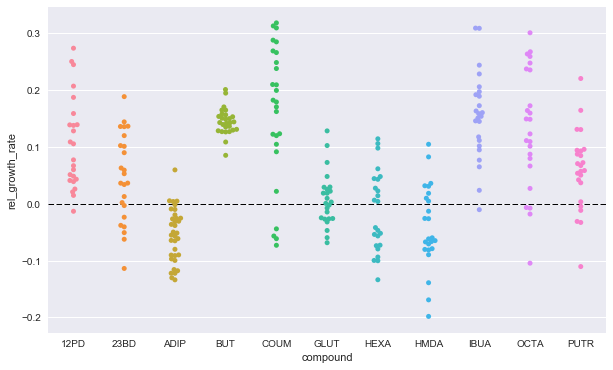

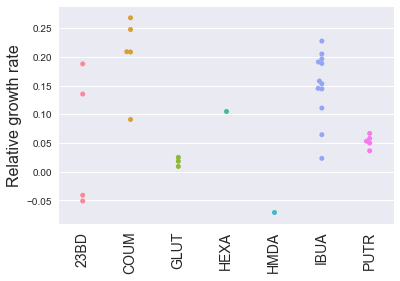

In [114]:
plot_df = m9_df.copy()
plot_df["compound"] = plot_df.index.map(lambda x: x.split("-")[0][:-1])
plot_df = plot_df[plot_df.index != "MG1655"]
plt.figure(figsize=[10, 6])
plt.plot([-0.5, 10.5], [0, 0], "k--", linewidth=1)
sbn.swarmplot(x="compound", y="rel_growth_rate", data=plot_df)
plt.figure()
sbn.swarmplot(x="compound", y="rel_growth_rate", data=plot_df[plot_df.index.isin(mut_df[mut_df["rpoB"] == 1].index)])
plt.xlabel("")
plt.ylabel("Relative growth rate", fontsize=16)
plt.xticks(fontsize=14, rotation=90)

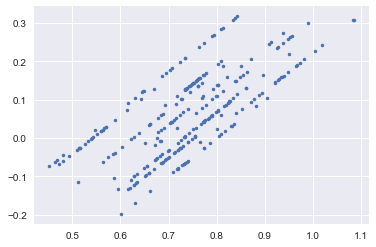

In [115]:
plt.plot(m9_df["growth_rate"], m9_df["rel_growth_rate"], ".")

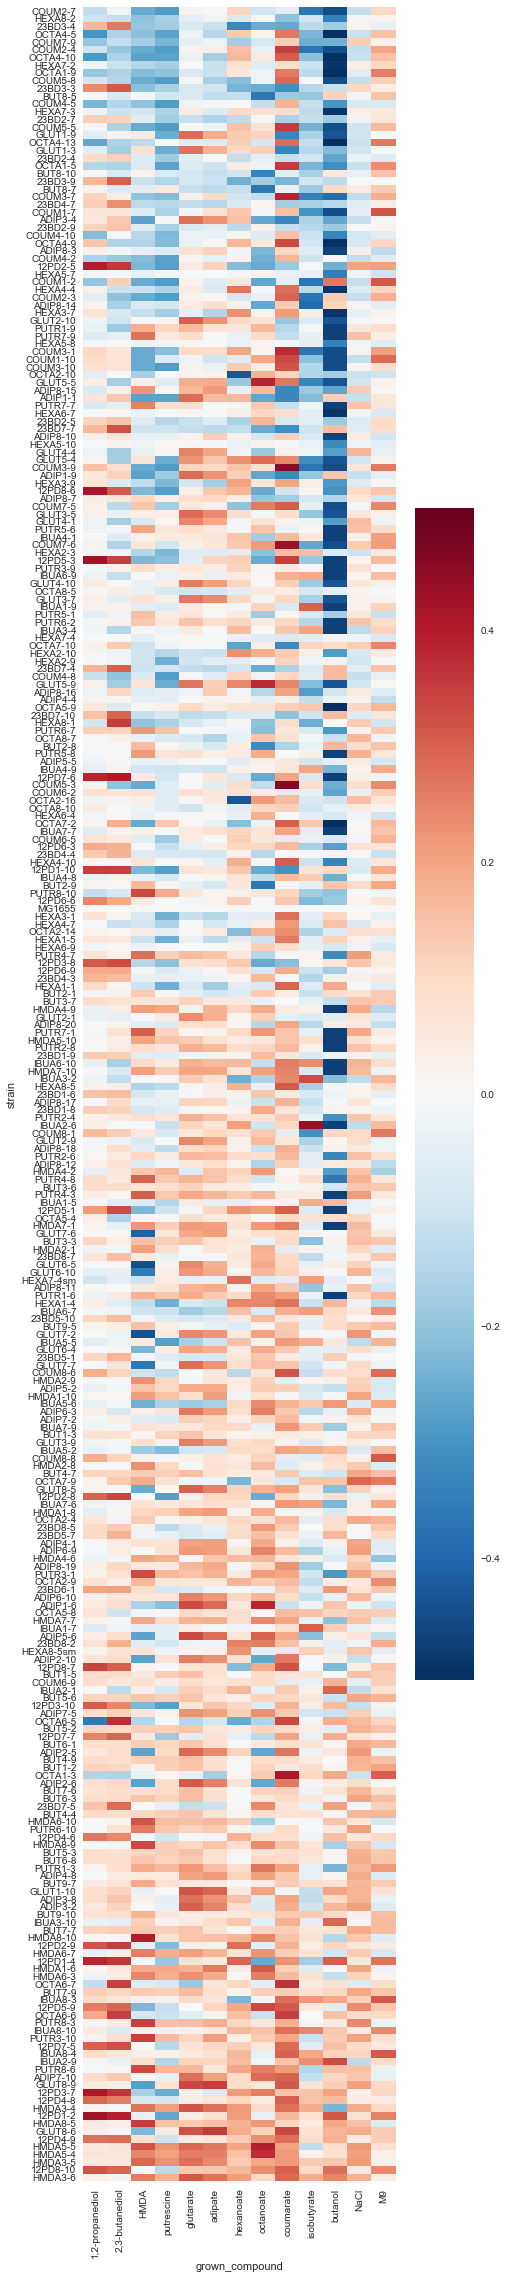

In [172]:
plot_df = growth_df[growth_df["compound"] != "AGLUT"][comp_names]
# plot_df = plot_df - plot_df.mean()
# plot_df = plot_df / plot_df.std()

def tol_metric(row):
        
    if pd.isnull(row["coumarate"]):
        coum = row[comp_name_order].mean()
    else:
        coum = row["coumarate"]
        
    if pd.isnull(row["isobutyrate"]):
        ibua = row[comp_name_order].mean()
    else:
        ibua = row["isobutyrate"]
    if "butanol" in row:
        if pd.isnull(row["butanol"]):
            but = row[comp_name_order].mean()
        else:
            but = row["butanol"]
    return (
        (
            row[["HMDA", "putrescine"]].mean() + 
            row[["glutarate", "adipate"]].mean() + 
            row[["hexanoate", "octanoate"]].mean()
        )
        + ibua + row["2,3-butanediol"] + coum) + but

test_order = plot_df.sum(1).sort_values().index
test_order = plot_df.apply(tol_metric, axis=1).sort_values().index

plot_df["M9"] = m9_df["rel_growth_rate"]
# test_order = (plot_df["HMDA"]  - plot_df["putrescine"]).sort_values().index
plt.figure(figsize=[7, 40])
sorted_plot_df = plot_df.reindex(test_order)
sbn.heatmap(sorted_plot_df)

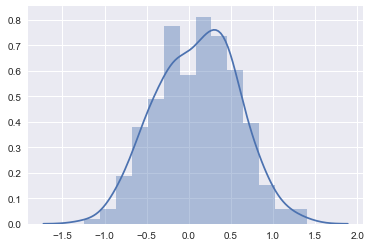

In [173]:
sbn.distplot(plot_df.apply(tol_metric, axis=1))

In [174]:
for strain in sorted_plot_df.index[-20:]:
    print(strain, strains_to_genes.get(strain))

IBUA8-10 ['rrsA', 'ilvN', 'glyQ', 'pykF', 'yffQ']
PUTR3-10 ['spoT', 'iscR', 'proV', 'rph', 'ygaC', 'icdC', 'lexA', 'nusG', 'tyrB']
12PD7-5 None
IBUA8-4 ['ilvH', 'glyQ', 'pykF']
IBUA2-9 ['bglF', 'yijD', 'ydhZ', 'rpoC', 'sapD', 'rpsC', 'yobF']
PUTR8-6 ['pyrE', 'rpsG', 'leuL', 'spoT', 'mreB', 'argG', 'yedP', 'nagC', 'proX']
ADIP7-10 None
GLUT8-9 ['polB', 'sdaC', 'sapC', 'proV', 'rpoC', 'ymfE', 'yobF', 'kgtP']
12PD3-7 None
12PD4-8 None
HMDA3-4 ['pyrE', 'rpoC', 'kup', 'nagA']
12PD1-2 None
HMDA8-5 ['pyrE', 'cynR', 'rnt', 'mdtK', 'proV', 'lhr', 'nagC', 'xapR']
GLUT8-6 ['polB', 'sapC', 'proV', 'rpoC', 'kgtP', 'nagA']
12PD4-9 None
HMDA5-5 ['ptsP', 'nagC', 'ybeX', 'pyrE']
HMDA5-4 ['pnp', 'ampC', 'nagC', 'ptsP', 'pyrE']
HMDA3-5 ['pyrE', 'ygbT', 'ygeG', 'ybeX', 'kup', 'nagC']
12PD8-10 None
HMDA3-6 ['pyrE', 'rpoC', 'gatY', 'kup', 'nagA']


In [208]:
pca = PCA(9)
test_df = plot_df[comp_name_order]
test_df = test_df.dropna()
test_df = (test_df - test_df.mean()) / test_df.std()
pca.fit_transform(test_df)

array([[-2.54551045,  3.751866  ,  1.15458492, ..., -0.82009768,
         0.89644332,  0.06193684],
       [-0.85030607,  4.21594348,  2.20049226, ..., -0.36837536,
        -0.08913259,  0.25263748],
       [-1.1363902 ,  3.60302245,  2.70762019, ..., -0.25121574,
        -2.19951763,  0.22241931],
       ..., 
       [ 0.91126015, -1.80367858, -1.60603314, ..., -0.7132909 ,
        -1.43690815,  0.84934282],
       [ 3.06916126,  0.27246299, -0.68861363, ...,  0.09033524,
        -1.28682268,  0.00852232],
       [ 2.62925281, -0.35720279, -0.05535032, ..., -1.458143  ,
        -1.5756476 ,  0.05086934]])

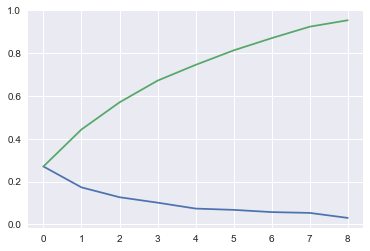

In [210]:
plt.plot(pca.explained_variance_ratio_)
plt.plot(np.cumsum(pca.explained_variance_ratio_))

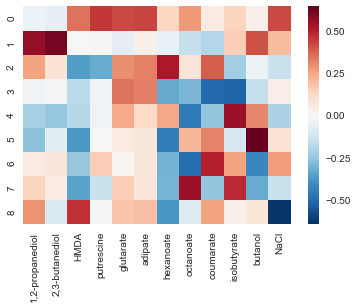

In [212]:
sbn.heatmap(pca.components_)
plt.xticks(np.array(range(len(comp_name_order)))+0.5, comp_name_order, rotation=90)
None

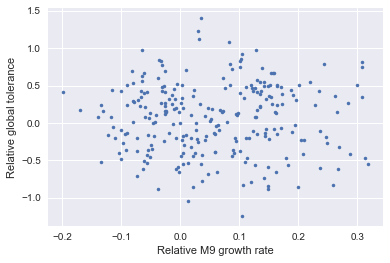

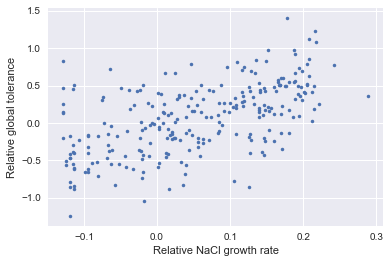

In [217]:
plt.figure()
test_df = plot_df[~plot_df.index.str.startswith("12PD")]
plt.plot(
    test_df["M9"],
    test_df.apply(tol_metric, axis=1),
    "."
)
plt.xlabel("Relative M9 growth rate")
plt.ylabel("Relative global tolerance")

plt.savefig("../../Plots/Draft_plots/M9_global_tol.pdf", dpi=10)

plt.figure()

test_df = plot_df[~plot_df.index.str.startswith("12PD")]
plt.plot(
    test_df["NaCl"],
    test_df.apply(tol_metric, axis=1),
    "."
)
plt.xlabel("Relative NaCl growth rate")
plt.ylabel("Relative global tolerance")

plt.savefig("../../Plots/Draft_plots/NaCl_global_tol.pdf", dpi=10)

In [221]:
test_df["NaCl"].corr(
    test_df.apply(tol_metric, axis=1)
) ** 2

0.32313315131659481

In [191]:
test_df["NaCl"].corr(test_df.apply(tol_metric, axis=1))

0.56844801988976512

In [ ]:
[s for s in strains_to_muts if s.startswith("12PD")]

In [ ]:
[s for s, gs in strains_to_genes.items() if "nagC" in gs]

In [ ]:
print(strains_to_genes["HMDA5-5"])
print(strains_to_genes["HMDA5-10"])

In [ ]:
nagA_muts = [m for m, gs in muts_to_genes.items() if "nagC" in gs]
for s, muts in strains_to_muts.items():
    if s not in strains_to_genes:
        continue
    for m in muts:
        if m in nagA_muts: # and s.startswith("GLUT"):
            print(s, m)

In [ ]:
strain = "GLUT2-10"
print(strain)
for mut in strains_to_muts[strain]:
    print(mut, mutation_effects[mut], muts_to_genes[mut])

In [ ]:
mob_positions = []
for m, gs in muts_to_genes.items():
    if m.startswith("MOB"):
        pos = int(m.split("-")[1])
        mob_positions.append(pos)
        if 1250000 < pos < 1300000:
            print(muts_to_genes[m], m)
    
sbn.distplot(mob_positions, kde=False, bins=2000)
plt.xlim([1000000, 1500000])

In [ ]:
sbn.heatmap(growth_df[growth_df.index.str.startswith("HMDA")][comp_name_order].transpose().corr("spearman"))

In [ ]:
for s, gs in strains_to_genes.items():
    for g in gs:
        if g.startswith("nan"):
            print(s, g)

In [ ]:
sorted([s for s, gs in strains_to_genes.items() if "nagA" in gs or "nagC" in gs])

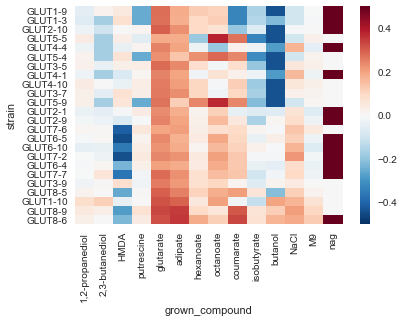

In [179]:
comp = "GLUT"

mut_df = pd.DataFrame({s: {g: 1 for g in gs} for s, gs in strains_to_genes.items() if s.startswith(comp)}).fillna(0).transpose()

my_df = sorted_plot_df[sorted_plot_df.index.str.startswith(comp)]
my_df = my_df[my_df.index.isin(mut_df.index)]
my_df["nag"] = (mut_df["nagA"] + mut_df["nagC"]) / 2
sbn.heatmap(my_df)

In [180]:
mut_df["nag"] = mut_df["nagA"] + mut_df["nagC"]
mut_df.corr()["nag"].sort_values()

sspA   -0.486172
ytfR   -0.410891
rpoB   -0.410891
yobF   -0.226679
ymfE   -0.226679
nohQ   -0.226679
mprA   -0.226679
sdaC   -0.226679
yagU   -0.226679
wzzE   -0.226679
csiD   -0.226679
ssuA   -0.226679
rclB   -0.226679
yiaT   -0.226679
hofM   -0.226679
greA   -0.226679
insG   -0.226679
polB   -0.158035
rpoC   -0.151142
proV   -0.048280
sapC   -0.025214
rnt     0.060058
spoT    0.158035
ydfI    0.191805
rspA    0.191805
ygjP    0.191805
tomB    0.191805
hcaD    0.191805
yfdC    0.191805
uvrD    0.191805
yhfA    0.191805
yhfX    0.191805
yhiL    0.191805
yliE    0.191805
ybeF    0.191805
aceK    0.191805
rrlA    0.191805
rsmC    0.191805
rrlC    0.191805
rplM    0.191805
roxA    0.191805
rlmI    0.191805
dkgA    0.191805
ravA    0.191805
tdcD    0.191805
fruB    0.191805
lldR    0.191805
cspE    0.277350
proX    0.277350
yfjL    0.277350
rnb     0.347677
nagA    0.471881
nagC    0.650444
nag     1.000000
kgtP         NaN
Name: nag, dtype: float64

In [181]:
sorted([s for s in strains_to_muts if s.startswith("HMDA")])

['HMDA1-10',
 'HMDA2-1',
 'HMDA2-8',
 'HMDA3-4',
 'HMDA3-5',
 'HMDA3-6',
 'HMDA4-2',
 'HMDA4-6',
 'HMDA4-9',
 'HMDA5-10',
 'HMDA5-4',
 'HMDA5-5',
 'HMDA6-3',
 'HMDA6-7',
 'HMDA7-1',
 'HMDA7-10',
 'HMDA7-7',
 'HMDA8-10',
 'HMDA8-5',
 'HMDA8-9']

In [182]:
growth_df.loc[["ADIP8-13", "ADIP8-14"]]

grown_compound  1,2-propanediol  2,3-butanediol      HMDA      NaCl   adipate  \
strain                                                                          
ADIP8-13                    NaN             NaN       NaN       NaN       NaN   
ADIP8-14               0.019881       -0.163144 -0.076469  0.012839  0.083127   

grown_compound   butanol  coumarate  glutarate  hexanoate  isobutyrate  \
strain                                                                   
ADIP8-13             NaN        NaN        NaN        NaN          NaN   
ADIP8-14        0.113673   0.129452   0.046091   0.030781    -0.393987   

grown_compound  octanoate  putrescine compound  
strain                                          
ADIP8-13              NaN         NaN      NaN  
ADIP8-14        -0.260741   -0.088213     ADIP

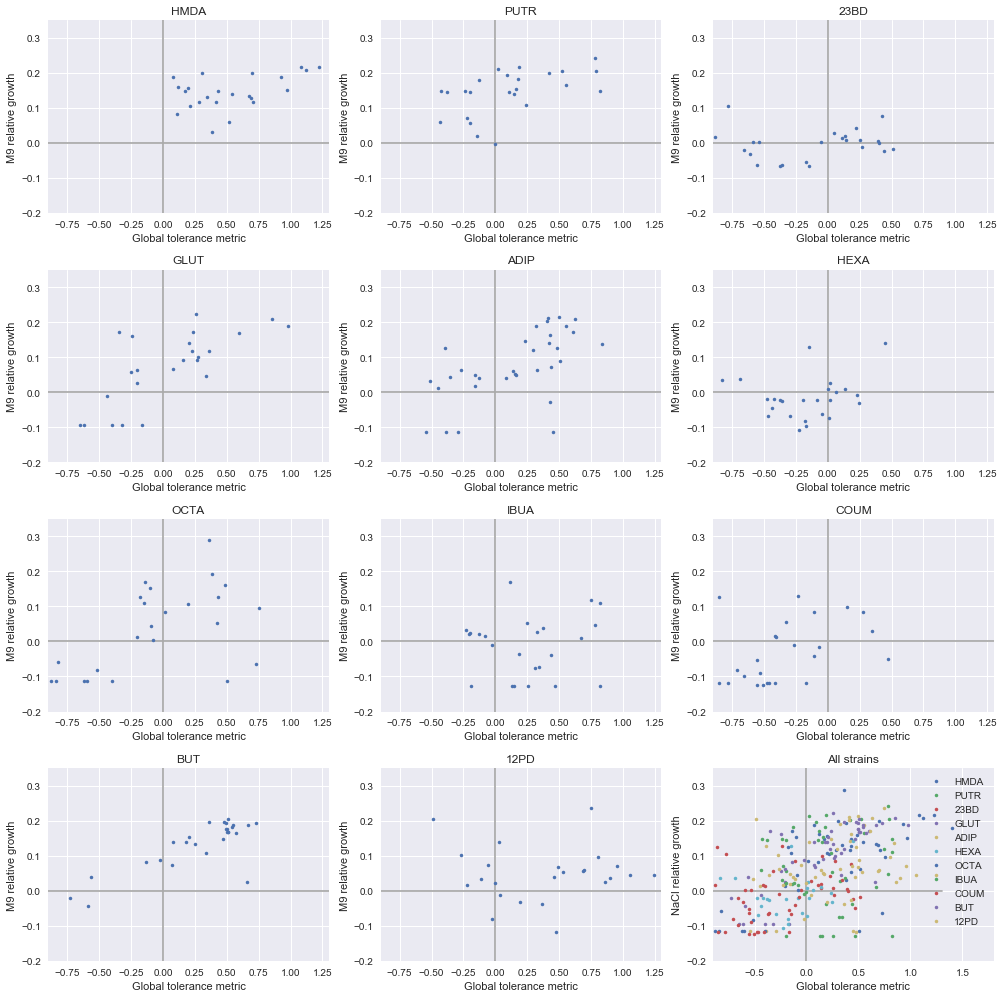

In [185]:
plt.figure(figsize=[14, 14])

plt.subplot(4, 3, 12)
plt.plot([-0.9, 1.3], [0, 0], color="#aaaaaa")
plt.plot([0, 0], [-0.2, 0.35], color="#aaaaaa")
plt.xlim([-.9, 1.8])
plt.ylim([-0.2, 0.35])



for i, comp in enumerate(comp_order + ["12PD"]):
    plt.subplot(4, 3, i+1)
    comp_df = plot_df[plot_df.index.str.startswith(comp)]
    plt.plot([-0.9, 1.3], [0, 0], color="#aaaaaa")
    plt.plot([0, 0], [-0.2, 0.35], color="#aaaaaa")
    plt.plot(comp_df.apply(tol_metric, axis=1), comp_df["NaCl"], ".")
    plt.title(comp)
    plt.xlim([-.9, 1.3])
    plt.ylim([-0.2, 0.35])
    plt.ylabel("M9 relative growth")
    plt.xlabel("Global tolerance metric")
    
    plt.subplot(4, 3, 12)
    plt.plot(comp_df.apply(tol_metric, axis=1), comp_df["NaCl"], ".", label=comp)

plt.subplot(4, 3, 12)
plt.title("All strains")
plt.legend()
plt.ylabel("NaCl relative growth")
plt.xlabel("Global tolerance metric")    

plt.tight_layout()
#plt.savefig("../../Plots/Draft_plots/General_tolerance.pdf")

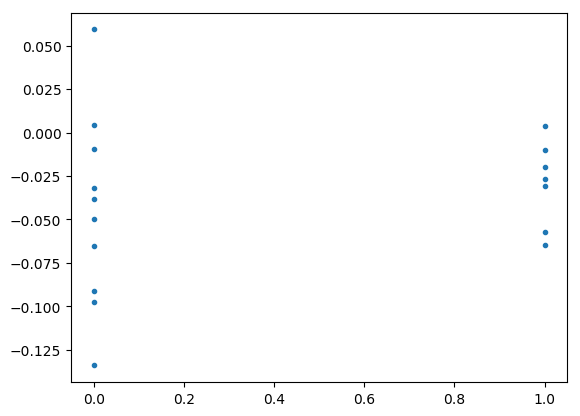

In [436]:
plt.plot(
    mut_df["nagC"] + mut_df["nagA"],
    # sorted_plot_df.reindex(mut_df.index).apply(tol_metric, axis=1),
    sorted_plot_df.reindex(mut_df.index)["M9"],
    "."
)

In [163]:
def find_genes(strain_start):
    for s, gs in strains_to_genes.items():
        if s.startswith(strain_start):
            print(s, gs)
    
find_genes("GLUT5")

GLUT5-5 ['spoT', 'kgtP', 'sspA', 'rpoB', 'ytfR']
GLUT5-4 ['yagU', 'spoT', 'rpoB', 'kgtP', 'sspA', 'ytfR']
GLUT5-9 ['spoT', 'kgtP', 'sspA', 'rpoB', 'ytfR']


In [506]:
find_genes("HMDA7-1")
find_genes("PUTR8-10")

HMDA7-1 ['nusA', 'rpsG', 'sspA', 'wbbK']
HMDA7-10 ['nusA', 'rpsG', 'sspA', 'wbbK']
PUTR8-10 ['pyrE', 'rpsG', 'spoT', 'mreB', 'argG', 'sfmH', 'nagC', 'proX']


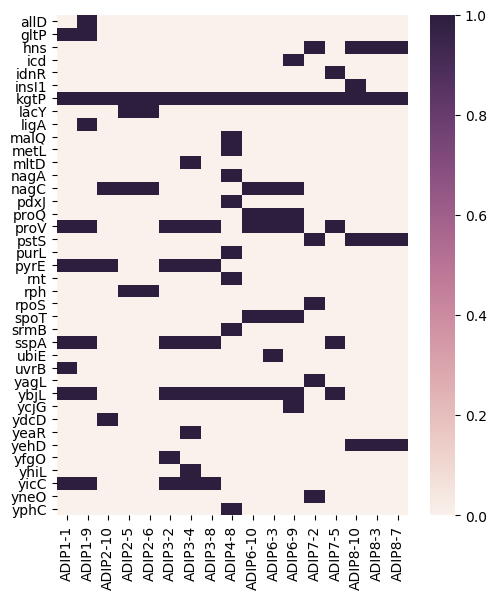

In [504]:
gene_plot_df = pd.DataFrame({s: {g: 1 for g in gs} for s, gs in strains_to_genes.items() if s.startswith("ADIP")}).fillna(0)
plt.figure(figsize=[len(gene_plot_df.columns)/3, len(gene_plot_df)/6])
sbn.heatmap(
    gene_plot_df
)

In [165]:
find_genes("HMDA")

HMDA3-6 ['pyrE', 'rpoC', 'gatY', 'kup', 'nagA']
HMDA5-5 ['ptsP', 'nagC', 'ybeX', 'pyrE']
HMDA5-10 ['ptsP', 'pyrE', 'pstB', 'stpA', 'pepA']
HMDA2-1 ['ptsP', 'proV', 'rpsA', 'pyrE']
HMDA1-10 ['purL', 'spoT', 'proV', 'rpoB', 'lexA', 'rpsA', 'rph']
HMDA8-9 ['pyrE', 'rnt', 'mdtK', 'proV', 'lhr', 'nagC']
HMDA5-4 ['pnp', 'ampC', 'nagC', 'ptsP', 'pyrE']
HMDA8-10 ['pyrE', 'rnt', 'mdtK', 'lhr', 'proV', 'mpl', 'nagC']
HMDA2-8 ['pyrE', 'proV', 'ptsP', 'rpsA']
HMDA7-7 ['nusA', 'rpsG', 'sspA']
HMDA3-4 ['pyrE', 'rpoC', 'kup', 'nagA']
HMDA7-1 ['nusA', 'rpsG', 'sspA', 'wbbK']
HMDA8-5 ['pyrE', 'cynR', 'rnt', 'mdtK', 'proV', 'lhr', 'nagC', 'xapR']
HMDA3-5 ['pyrE', 'ygbT', 'ygeG', 'ybeX', 'kup', 'nagC']
HMDA7-10 ['nusA', 'rpsG', 'sspA', 'wbbK']


In [143]:
comp_name_order = [
    "1,2-propanediol", "2,3-butanediol", "HMDA", "putrescine", "glutarate",
    "adipate", "hexanoate", "octanoate", "coumarate", "isobutyrate", "NaCl"
]

In [457]:
strains_to_genes["GLUT7-7"]

['rnt',
 'rrlA',
 'dkgA',
 'ybeF',
 'uvrD',
 'nagC',
 'yhiL',
 'rlmI',
 'roxA',
 'spoT',
 'lldR',
 'yhfA',
 'aceK',
 'rrlC',
 'ravA',
 'rplM',
 'kgtP',
 'yhfX',
 'rsmC',
 'tdcD',
 'fruB',
 'yliE',
 'yfdC']

In [378]:
ax1.boxplot()

dict_keys(['medians', 'means', 'whiskers', 'fliers', 'caps', 'boxes'])

In [415]:
box2["fliers"][0].get_data()

(array([ 9.1,  9.1]), array([1399,  694]))

In [390]:
a = box1["caps"][0]
a.set_color()

In [335]:
comp_df

Compound    strain            dupl   num   Mutation type
253     HMDA   HMDA5-5  Other mutation     4  Other mutation
265     HMDA   HMDA8-9  Other mutation     6  Other mutation
264     HMDA   HMDA8-9     Duplication     0     Duplication
263     HMDA   HMDA8-5  Other mutation     8  Other mutation
262     HMDA   HMDA8-5     Duplication     0     Duplication
261     HMDA  HMDA8-10  Other mutation     7  Other mutation
260     HMDA  HMDA8-10     Duplication     0     Duplication
259     HMDA   HMDA7-7  Other mutation     3  Other mutation
258     HMDA   HMDA7-7     Duplication     0     Duplication
257     HMDA  HMDA7-10  Other mutation     4  Other mutation
256     HMDA  HMDA7-10     Duplication     0     Duplication
255     HMDA   HMDA7-1  Other mutation     4  Other mutation
254     HMDA   HMDA7-1     Duplication     0     Duplication
252     HMDA   HMDA5-5     Duplication  1395     Duplication
251     HMDA   HMDA5-4  Other mutation     5  Other mutation
236     HMDA  HMDA1-10     Duplication     0     Duplication
249     HMDA  HMDA5-10  Other mutation     5  Other mutation
237     HMDA  HMDA1-10  Other mutation     7  Other mutation
238     HMDA   HMDA2-1     Duplication   671     Duplication
239     HMDA   HMDA2-1  Other mutation     4  Other mutation
240     HMDA   HMDA2-8     Duplication   678     Duplication
250     HMDA   HMDA5-4     Duplication  1410     Duplication
242     HMDA   HMDA3-4     Duplication     0     Duplication
241     HMDA   HMDA2-8  Other mutation     4  Other mutation
244     HMDA   HMDA3-5     Duplication  1369     Duplication
245     HMDA   HMDA3-5  Other mutation     6  Other mutation
246     HMDA   HMDA3-6     Duplication   686     Duplication
247     HMDA   HMDA3-6  Other mutation     5  Other mutation
248     HMDA  HMDA5-10     Duplication     0     Duplication
243     HMDA   HMDA3-4  Other mutation     4  Other mutation

In [262]:
regr_df = alt_plot_df[alt_plot_df["Mutation type"] == "Other mutation"].copy()
regr_df["pool"] = regr_df["strain"].map(lambda x: x.split("-")[0])
# regr_df = regr_df.groupby("pool").mean().reset_index()
# regr_df["Compound"] = regr_df["pool"].map(lambda x: x[:-1])

In [263]:
regr_df.to_csv("../../Data/Mutation_count_df.csv")

In [264]:
regr_df

Compound    strain            dupl  num   Mutation type   pool
241     HMDA   HMDA5-5  Other mutation    4  Other mutation  HMDA5
253     HMDA   HMDA8-9  Other mutation    6  Other mutation  HMDA8
251     HMDA   HMDA8-5  Other mutation    8  Other mutation  HMDA8
249     HMDA  HMDA8-10  Other mutation    7  Other mutation  HMDA8
247     HMDA   HMDA7-7  Other mutation    3  Other mutation  HMDA7
245     HMDA  HMDA7-10  Other mutation    4  Other mutation  HMDA7
243     HMDA   HMDA7-1  Other mutation    4  Other mutation  HMDA7
239     HMDA   HMDA5-4  Other mutation    5  Other mutation  HMDA5
237     HMDA  HMDA5-10  Other mutation    5  Other mutation  HMDA5
225     HMDA  HMDA1-10  Other mutation    7  Other mutation  HMDA1
227     HMDA   HMDA2-1  Other mutation    4  Other mutation  HMDA2
229     HMDA   HMDA2-8  Other mutation    4  Other mutation  HMDA2
233     HMDA   HMDA3-5  Other mutation    6  Other mutation  HMDA3
235     HMDA   HMDA3-6  Other mutation    5  Other mutation  HMDA3
231     HMDA   HMDA3-4  Other mutation    4  Other mutation  HMDA3
329     PUTR   PUTR2-6  Other mutation    3  Other mutation  PUTR2
327     PUTR   PUTR2-4  Other mutation    3  Other mutation  PUTR2
365     PUTR   PUTR8-6  Other mutation    9  Other mutation  PUTR8
363     PUTR   PUTR8-3  Other mutation    6  Other mutation  PUTR8
361     PUTR  PUTR8-10  Other mutation    8  Other mutation  PUTR8
359     PUTR   PUTR7-9  Other mutation    4  Other mutation  PUTR7
357     PUTR   PUTR7-7  Other mutation    3  Other mutation  PUTR7
355     PUTR   PUTR7-1  Other mutation    4  Other mutation  PUTR7
353     PUTR   PUTR6-7  Other mutation   10  Other mutation  PUTR6
351     PUTR   PUTR6-2  Other mutation    5  Other mutation  PUTR6
349     PUTR  PUTR6-10  Other mutation   11  Other mutation  PUTR6
347     PUTR   PUTR5-8  Other mutation    2  Other mutation  PUTR5
333     PUTR  PUTR3-10  Other mutation   10  Other mutation  PUTR3
335     PUTR   PUTR3-9  Other mutation    7  Other mutation  PUTR3
337     PUTR   PUTR4-3  Other mutation    5  Other mutation  PUTR4
..       ...       ...             ...  ...             ...    ...
129     COUM   COUM6-5  Other mutation    7  Other mutation  COUM6
117     COUM   COUM4-2  Other mutation    5  Other mutation  COUM4
113     COUM   COUM3-9  Other mutation    8  Other mutation  COUM3
115     COUM  COUM4-10  Other mutation    4  Other mutation  COUM4
127     COUM   COUM6-2  Other mutation    7  Other mutation  COUM6
119     COUM   COUM4-5  Other mutation    6  Other mutation  COUM4
111     COUM  COUM3-10  Other mutation    8  Other mutation  COUM3
121     COUM   COUM5-3  Other mutation    9  Other mutation  COUM5
123     COUM   COUM5-5  Other mutation    6  Other mutation  COUM5
125     COUM   COUM5-8  Other mutation    9  Other mutation  COUM5
83       BUT    BUT5-2  Other mutation    7  Other mutation   BUT5
85       BUT    BUT5-3  Other mutation    6  Other mutation   BUT5
81       BUT    BUT4-9  Other mutation    6  Other mutation   BUT4
87       BUT    BUT6-1  Other mutation    5  Other mutation   BUT6
89       BUT    BUT6-3  Other mutation    5  Other mutation   BUT6
79       BUT    BUT4-7  Other mutation    7  Other mutation   BUT4
77       BUT    BUT4-4  Other mutation    6  Other mutation   BUT4
75       BUT    BUT3-7  Other mutation    6  Other mutation   BUT3
73       BUT    BUT3-6  Other mutation    6  Other mutation   BUT3
63       BUT    BUT1-2  Other mutation    6  Other mutation   BUT1
65       BUT    BUT1-3  Other mutation    5  Other mutation   BUT1
67       BUT    BUT1-5  Other mutation    6  Other mutation   BUT1
69       BUT    BUT2-9  Other mutation    4  Other mutation   BUT2
101      BUT    BUT9-7  Other mutation    5  Other mutation   BUT9
99       BUT   BUT9-10  Other mutation    6  Other mutation   BUT9
97       BUT    BUT7-9  Other mutation    5  Other mutation   BUT7
95       BUT    BUT7-7  Other mutation    5  Other mutation   BUT7
93       BUT    BUT7-6  Other mutation    5  Other 

In [100]:
len(strains_to_muts["IBUA3-2"])

42

In [102]:
{k: v for k, v in strains_to_muts.items() if k.startswith("IBUA")}

{'IBUA1-7': ['MOB-1755755-IS5-4',
  'SNP-4183097-T',
  'SNP-20771-A',
  'MOB-2967576-IS5-4'],
 'IBUA1-9': ['SNP-4182938-C',
  'SNP-1969313-A',
  'MOB-3327665-IS5-4',
  'DEL-255591-18364',
  'SNP-1756637-C',
  'SNP-2037332-T'],
 'IBUA2-1': ['MOB-1755687-IS5-4',
  'SNP-4187619-A',
  'SNP-1352926-T',
  'MOB-1907448-IS5-4',
  'SNP-3449388-T',
  'SNP-4161966-A',
  'DEL-3905639-1'],
 'IBUA2-6': ['MOB-1755687-IS5-4',
  'SNP-4187619-A',
  'SNP-1352926-T',
  'MOB-1907448-IS5-4',
  'INS-3449508-GAACATAACGCGACG',
  'SNP-4161966-A',
  'DEL-3905639-1'],
 'IBUA2-9': ['MOB-1755687-IS5-4',
  'SNP-4187619-A',
  'SNP-1352926-T',
  'MOB-1907448-IS5-4',
  'SNP-3449388-T',
  'SNP-4161966-A',
  'DEL-3905639-1'],
 'IBUA3-10': ['SNP-1352163-A',
  'MOB-1472662-IS5-4',
  'MOB-1757082-+G-S5',
  'SNP-4182820-T'],
 'IBUA3-2': ['SNP-2591492-C',
  'SNP-1821514-G',
  'INS-111028-46 bp',
  'SNP-2511580-C',
  'SNP-1502324-G',
  'SNP-146136-G',
  'SNP-1614214-G',
  'SNP-1583769-G',
  'SNP-100657-G',
  'MOB-1425236-IS5-4

In [107]:
[(k, v) for k, v in strains_to_genes.items() if k.startswith("IBUA")]

[('IBUA7-7', ['lysU', 'rpsL', 'sapC', 'pykF', 'rpoB']),
 ('IBUA4-9', ['speA', 'infA', 'yaiP', 'pykF', 'rpoB', 'bglG']),
 ('IBUA5-6', ['rpoS', 'prfA', 'pykF', 'rpoB']),
 ('IBUA7-9', ['gadE', 'sapC', 'pykF', 'rpoB']),
 ('IBUA2-6', ['bglF', 'yijD', 'ydhZ', 'rpoC', 'sapD', 'rpsC', 'yobF']),
 ('IBUA2-1', ['bglF', 'yijD', 'ydhZ', 'rpoC', 'sapD', 'rpsC', 'yobF']),
 ('IBUA3-10', ['sapF', 'ydbA', 'pykF', 'rpoB']),
 ('IBUA6-9', ['rne', 'pykF', 'ybbW', 'rpoC', 'prfA', 'glyQ']),
 ('IBUA5-2', ['rpoS', 'prfA', 'pykF', 'rpoB']),
 ('IBUA2-9', ['bglF', 'yijD', 'ydhZ', 'rpoC', 'sapD', 'rpsC', 'yobF']),
 ('IBUA1-7', ['ptsP', 'insA', 'pykF', 'rpoB']),
 ('IBUA8-10', ['rrsA', 'ilvN', 'glyQ', 'pykF', 'yffQ']),
 ('IBUA1-9', ['pykF', 'cheR', 'rlmE', 'rpoB', 'yedV']),
 ('IBUA6-7', ['pyrE', 'pykF', 'rpoB', 'infB', 'glyQ', 'rpoS']),
 ('IBUA7-6', ['sapC', 'pykF', 'rpoB']),
 ('IBUA8-3', ['ilvH', 'glyQ', 'pykF']),
 ('IBUA4-8', ['pykF', 'rpsD', 'rpoB']),
 ('IBUA4-1', ['yjjQ', 'pykF', 'sapB', 'rpoB']),
 ('IBUA8-4', ['

In [13]:
[(m, [s for s in muts_to_strains.get(m, []) if 0 or s.startswith("23BD")]) for m, gs in muts_to_genes.items() if "metJ" in gs]

[('SNP-4128361-C', ['23BD4-3', '23BD5-1', '23BD4-4']),
 ('MOB-4128293-IS5-4', ['23BD2-9', '23BD2-7', '23BD2-4']),
 ('SNP-4128549-C', []),
 ('SNP-4128379-T', ['23BD5-7']),
 ('SNP-4128247-T', []),
 ('SNP-4128169-G', ['23BD4-7', '23BD5-10']),
 ('SNP-4128078-G', []),
 ('SNP-4128380-A', ['23BD1-6', '23BD1-9']),
 ('SNP-4128386-C', ['23BD7-7', '23BD7-4', '23BD7-5']),
 ('SNP-4128250-C', ['23BD6-1']),
 ('SNP-4128197-C', []),
 ('SNP-4128212-G', ['23BD8-7']),
 ('SNP-4128316-G', ['23BD3-4', '23BD3-3', '23BD3-9'])]

In [58]:
strains_to_genes["IBUA8-3"]

['ilvH', 'glyQ', 'pykF']

In [32]:
strains_to_muts["GLUT1-3"]

['MCDEL-257908-258683',
 'MCDEL-1299499-1300697',
 'DEL-1978503-776',
 'SNP-1347104-T',
 'SNP-1630841-A',
 'MCDEL-1978503-1979278',
 'DEL-1299499-1199',
 'INS-4296380-CG',
 'MCDEL-3423717-3424573',
 'SNP-4186605-C',
 'DEL-2173361-2',
 'DEL-2725668-1',
 'DEL-257908-776',
 'MCDEL-2726147-2730850',
 'INS-3560455-G',
 'SNP-3823664-C']

In [19]:
comp_list = ["HMDA", "putrescine", "1,2-propanediol", "2,3-butanediol", "adipate", "glutarate", "hexanoate", "octanoate",
            "coumarate", "isobutyrate"]

In [20]:
pca = PCA(2)

In [21]:
df = pd.read_csv("../Data/Growth_data/Cross_tolerance/Cleaned_growth_rates.tsv", sep="\t")

In [22]:
data = df.groupby(["strain", "grown_compound"]).mean().reset_index().pivot("strain", "grown_compound", "rel_growth_rate")
data = data[comp_list]

In [116]:
tsne_data = data.copy()
tsne_data = tsne_data[tsne_data.notnull().all(1)]
tsne_data = tsne_data[tsne_data.index != "MG1655"]
tsne_data = tsne_data[~tsne_data.index.str.startswith("BUT")]
tsne_data = tsne_data[~tsne_data.index.str.startswith("12PD")]
tsne_data["pool"] = tsne_data.index.map(lambda x: x.split("-")[0])
tsne_data = tsne_data.groupby("pool").mean()

tsne_data

tsne = TSNE(2, perplexity=5, early_exaggeration=1.5, method="exact", n_iter=5000, n_iter_without_progress=5000)
mds = MDS(2)

tsne_data = (tsne_data - tsne_data.mean()) / tsne_data.std()

coords = tsne.fit_transform(tsne_data.values)

tsne_data["comp"] = tsne_data.index.map(lambda x: x.split("-")[0][:-1])
groups = tsne_data.groupby("comp").groups

coord_df = pd.DataFrame(coords, index=tsne_data.index)

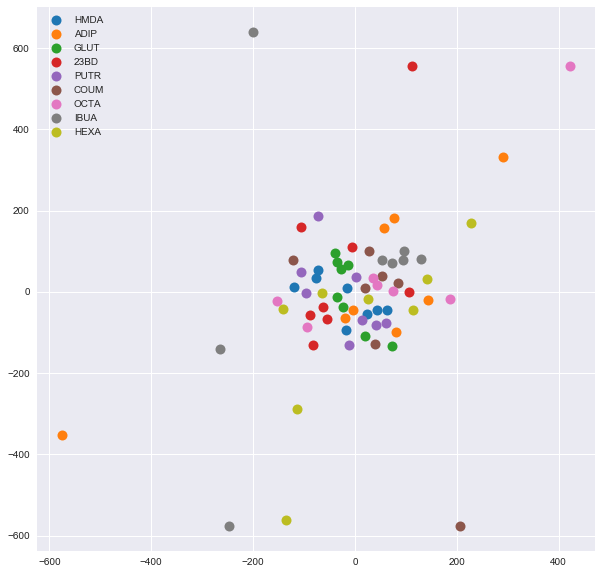

In [118]:
palette = list(palettes.Category10_10)

plt.figure(figsize=[10, 10])
i = 0
for comp, group in groups.items():
    comp_coords = coord_df.reindex(group)
    plt.plot(comp_coords.values[:, 0], comp_coords.values[:, 1], "o", label=comp, markersize=10, color=palette[i])
    i += 1
    
plt.legend()

plt.savefig("../../Plots/Draft_plots/Crosstol-tSNE.pdf")

In [392]:
notnull_data = data[data.notnull().all(1)]
output = pca.fit_transform(notnull_data.values)

In [10]:
#components = pd.DataFrame(pca.components_.T)
#components.index = data[data.notnull().all(1)].index
#components["compound"] = components.index.map(df.groupby("strain").first()["evolved_compound"].get)

transformed = pd.DataFrame(output)
transformed.index = notnull_data.index
transformed["compound"] = transformed.index.map(df.groupby("strain").first()["evolved_compound"].get)

In [11]:
transformed

0         1         compound
strain                                       
12PD1-10 -0.475402  0.404718  1,2-propanediol
12PD1-2  -0.220883  0.120658  1,2-propanediol
12PD1-4  -0.282325  0.081310  1,2-propanediol
12PD2-5  -0.517317  0.401817  1,2-propanediol
12PD2-8  -0.314759  0.184839  1,2-propanediol
12PD2-9  -0.208427  0.060013  1,2-propanediol
12PD3-10 -0.298010 -0.024077  1,2-propanediol
12PD3-7  -0.186600  0.009107  1,2-propanediol
12PD3-8  -0.377653  0.368711  1,2-propanediol
12PD4-6  -0.101573  0.089468  1,2-propanediol
12PD4-8  -0.089228 -0.026458  1,2-propanediol
12PD4-9   0.069004 -0.006625  1,2-propanediol
12PD5-1  -0.117962 -0.171677  1,2-propanediol
12PD5-3  -0.442932 -0.044885  1,2-propanediol
12PD5-9  -0.047931 -0.195773  1,2-propanediol
12PD6-3  -0.097477 -0.016194  1,2-propanediol
12PD6-6  -0.087304  0.076345  1,2-propanediol
12PD6-9  -0.174010  0.042731  1,2-propanediol
12PD7-5  -0.080245 -0.011447  1,2-propanediol
12PD7-6  -0.275848  0.250345  1,2-propanediol
12PD7-7  -0.226001  0.126831  1,2-propanediol
12PD8-10  0.071182 -0.058983  1,2-propanediol
12PD8-6  -0.441730  0.252899  1,2-propanediol
12PD8-7   0.011150  0.048029  1,2-propanediol
23BD1-6  -0.083414  0.048727   2,3-butanediol
23BD1-8  -0.075361 -0.008884   2,3-butanediol
23BD1-9  -0.072022  0.022734   2,3-butanediol
23BD2-4  -0.285327  0.189500   2,3-butanediol
23BD2-5  -0.202299  0.145716   2,3-butanediol
23BD2-7  -0.327194  0.214548   2,3-butanediol
...            ...       ...              ...
OCTA7-10 -0.183827  0.375747        octanoate
OCTA7-2  -0.150485 -0.048109        octanoate
OCTA7-9   0.060898  0.332800        octanoate
OCTA8-10 -0.087989 -0.043838        octanoate
OCTA8-5  -0.158669  0.020258        octanoate
OCTA8-7  -0.115637 -0.022240        octanoate
PUTR1-3   0.386101 -0.019226       putrescine
PUTR1-6   0.352292 -0.056522       putrescine
PUTR1-9   0.275203  0.137056       putrescine
PUTR2-4   0.171528  0.019402       putrescine
PUTR2-6   0.186058 -0.014274       putrescine
PUTR2-8   0.216583 -0.013666       putrescine
PUTR3-1   0.403195  0.054638       putrescine
PUTR3-10  0.364803  0.084626       putrescine
PUTR3-9   0.070529  0.074757       putrescine
PUTR4-3   0.393526  0.136052       putrescine
PUTR4-7   0.186412  0.272630       putrescine
PUTR4-8   0.238402  0.267183       putrescine
PUTR5-1   0.003563  0.143648       putrescine
PUTR5-6   0.201294  0.139204       putrescine
PUTR5-8   0.233620  0.117406       putrescine
PUTR6-10  0.216340  0.175814       putrescine
PUTR6-2   0.156153  0.017761       putrescine
PUTR6-7  -0.004774  0.284522       putrescine
PUTR7-1   0.288127  0.057663       putrescine
PUTR7-7   0.212881  0.200448       putrescine
PUTR7-9   0.193146  0.223272       putrescine
PUTR8-10  0.284724  0.065033       putrescine
PUTR8-3   0.373806  0.093643       putrescine
PUTR8-6   0.429736 -0.040923       putrescine

[265 rows x 3 columns]

In [13]:
len(data[~data.isnull().any(1)])

265

In [14]:
def points_to_ellipse(ar):
    cov = np.cov(ar.T)
    center = ar.mean(0)
    sizes, eigenvecs = np.linalg.eig(cov)
    sizes = np.sqrt(sizes)
    angle = np.arctan(eigenvecs[1, 0] / eigenvecs[0, 0])
    return center, sizes, angle

In [74]:
def prettify(s):
    if s == s.lower():
        return s.capitalize()
    else:
        return s

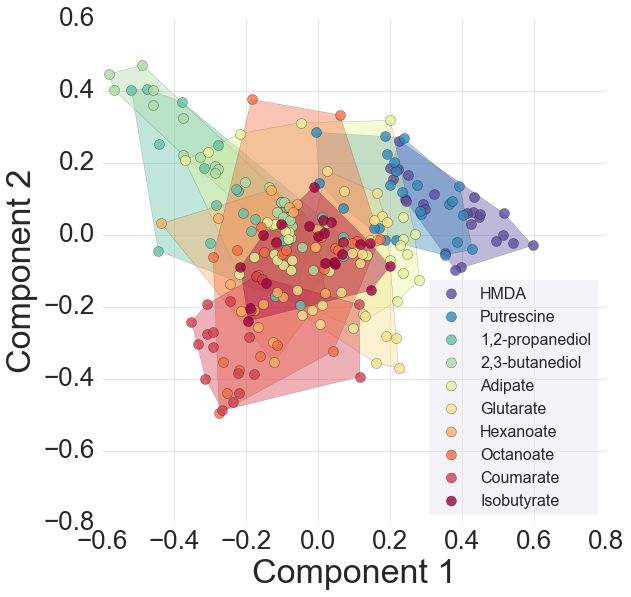

In [121]:
fig = plt.figure(figsize=[10, 10])

margin = 0.2
ax = fig.add_axes([margin, margin, 1-1.5*margin, 1-1.5*margin])

palette = palettes.Spectral10

i = 0

for comp in comp_list:
    if pd.isnull(comp) or comp == "butanol":
        continue
    dat = transformed[transformed["compound"] == comp]
    hull = ConvexHull(dat[[0, 1]])
    xs = list(dat[0][hull.vertices])
    xs.append(xs[0])
    ys = list(dat[1][hull.vertices])
    ys.append(ys[0])
    
    center, sizes, angle = points_to_ellipse(dat[[0, 1]].values)
    nums = 10
    poly = plt.Polygon(np.array([xs, ys]).T, facecolor=palette[i], alpha=0.4)
    ax.add_artist(poly)
    #fig.patch(xs, ys, color=palette[i], fill_alpha=0.2, line_color=palette[i], line_alpha=0.7)
    i += 1

i = 0
for comp in comp_list:
    if pd.isnull(comp) or comp == "butanol":
        continue
    dat = transformed[transformed["compound"] == comp]
    ax.scatter(dat[0], dat[1], s=100, facecolor=palette[i], alpha=0.8, label=prettify(comp), zorder=5)
    #fig.scatter(dat[0], dat[1], legend=comp, color=palette[i], line_color="black", line_width=0.3, size=7)
    i += 1
    
ax.legend(fontsize=16, loc="lower right", frameon=True, framealpha=0.5)
ax.set_xlim([-0.6, 0.8])
ax.set_ylim([-0.8, 0.6])
ax.patch.set_facecolor("white")
ax.grid(color="black", alpha=0.1)

ax.tick_params(labelsize=26)
ax.set_xlabel("Component 1", fontsize=34)
ax.set_ylabel("Component 2", fontsize=34)

plt.savefig("../Plots/Supplementary - Cross compound PCA.pdf")

In [117]:
ax.legend?

In [85]:
ax.tick_params?

In [66]:
ax.grid()

In [15]:
from scipy.spatial import ConvexHull

palette = palettes.Spectral10
fig = figure(
    x_range=[-0.7, 0.8],
    width=800
)
i = 0


for comp in comp_list:
    if pd.isnull(comp) or comp == "butanol":
        continue
    dat = transformed[transformed["compound"] == comp]
    hull = ConvexHull(dat[[0, 1]])
    xs = list(dat[0][hull.vertices])
    xs.append(xs[0])
    ys = list(dat[1][hull.vertices])
    ys.append(ys[0])
    
    center, sizes, angle = points_to_ellipse(dat[[0, 1]].values)
    nums = 10
    # for j in np.linspace(6, 0, nums):
    #     size = sizes * j
    #     fig.oval(center[0], center[1], size[0], size[1], angle=angle, color=palette[i], alpha=0.4/nums)
    fig.patch(xs, ys, color=palette[i], fill_alpha=0.2, line_color=palette[i], line_alpha=0.7)
    i += 1

i = 0
for comp in comp_list:
    if pd.isnull(comp) or comp == "butanol":
        continue
    dat = transformed[transformed["compound"] == comp]
    fig.scatter(dat[0], dat[1], legend=comp, color=palette[i], line_color="black", line_width=0.3, size=7)
    i += 1

fig.xaxis.axis_label = "PC 1 (%4.2f)" % pca.explained_variance_ratio_[0]
fig.yaxis.axis_label = "PC 2 (%4.2f)" % pca.explained_variance_ratio_[1]
fig.axis.axis_label_text_font_size = "27px"
fig.axis.major_label_text_font_size = "22px"
fig.legend.label_text_font_size = "16px"

show(fig)

In [29]:
import matplotlib.pyplot as plt

In [30]:
%matplotlib inline

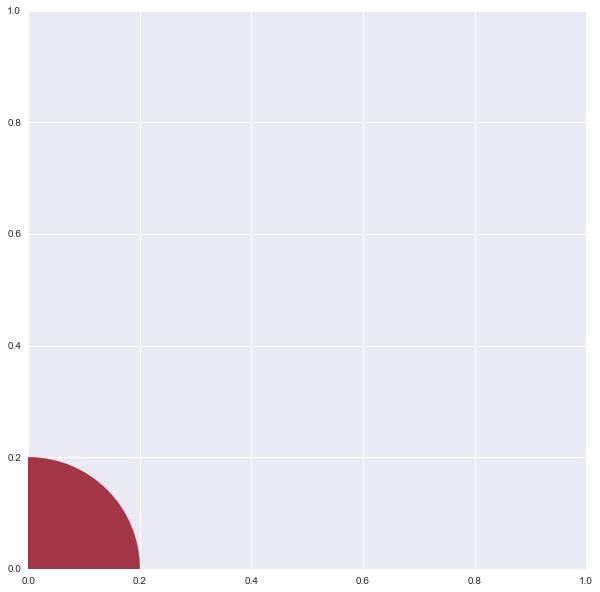

In [41]:
circle1 = plt.Circle((0, 0), 0.2, color="#a23647")
fig = plt.figure(figsize=[10, 10])
ax = fig.add_subplot(1, 1, 1)
ax.add_artist(circle1)

In [218]:
pca.components_.shape

(2, 10)

In [287]:
fig = figure(x_range=[-1, 1], y_range=[-1, 1])
for i, comp in enumerate(comp_list):
    comp_array = np.zeros(10)
    comp_array[i] = 1
    tr = pca.components_.dot(comp_array)
    fig.line([0, tr[0]], [0, tr[1]])
    fig.text([tr[0]*1.1], [tr[1]*1.1], [comp])
    
show(fig)

grown_compound
HMDA              -0.087197
putrescine        -0.117405
1,2-propanediol   -0.117405
2,3-butanediol    -0.145104
adipate            0.003624
glutarate         -0.145104
hexanoate         -0.041877
octanoate         -0.130428
coumarate         -0.135581
isobutyrate        0.003624
dtype: float64

In [236]:
pd_data = data[data.index.str.startswith("GLUT")]
fig = figure(x_range=comp_list)
pd_data = pd_data[comp_list]

for idx, row in pd_data.iterrows():
    fig.line(list(range(1, len(comp_list)+1)), row)

fig.xaxis.major_label_orientation = 1
fig.yaxis.axis_label = "Rel growth rate"
show(fig)

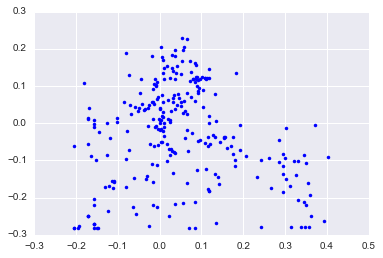

In [235]:
plt.plot(notnull_data["2,3-butanediol"], notnull_data["putrescine"], "b.")

In [119]:
m9_df = pd.read_csv("../Data/Growth_data/M9/M9_normalised_growth.csv")
screen_df = pd.read_csv("../Data/Growth_data/evolved-isolate-growth-data/Evolved_isolates_data_frame.tsv", sep="\t")
screen_df = screen_df[screen_df["growth_rate"] != 0]
evolv_dict = screen_df.groupby("strain").first()["compound"]

mg_m9 = dict(m9_df[m9_df["strain"] == "MG1655"].groupby("exp_name").mean()["growth_rate"])
mg_m9["HEXA"] = mg_m9["HEXA_group1"]
mg_comp = screen_df[screen_df["strain"] == "MG1655"].groupby("compound").mean()["growth_rate"]

m9_df = m9_df.groupby("strain").mean()
screen_df = screen_df.groupby("strain").mean()

screen_df["compound"] = screen_df.index.map(evolv_dict.get)
screen_df["m9_growth"] = screen_df.index.map(m9_df["growth_rate"].get)
screen_df = screen_df[screen_df.index != "MG1655"]

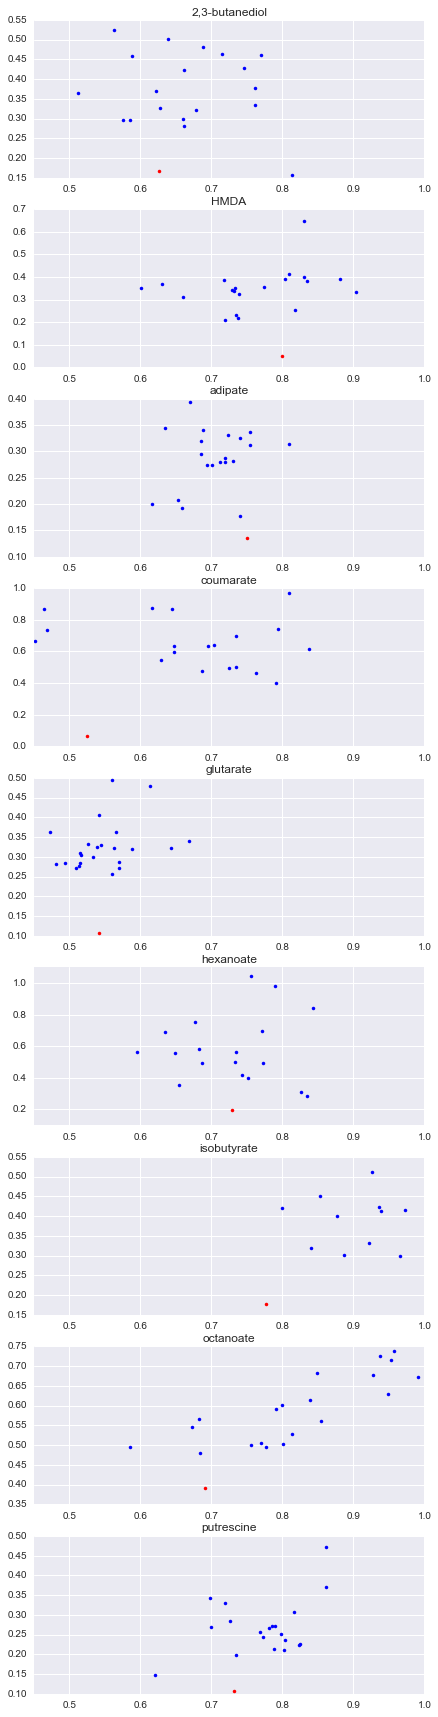

In [144]:
plt.figure(figsize=[7, 30])
for i, comp in enumerate(sorted(set(screen_df["compound"]) - {"butanol", "1,2-propanediol"})):
    plt.subplot(9, 1, i+1)
    plt.title(comp)
    comp_df = screen_df[screen_df["compound"] == comp]
    plt.plot(comp_df["m9_growth"], comp_df["growth_rate"], "b.")
    plt.plot(mg_m9[inv_comp_conv[comp]], mg_comp[comp], "r.")
    plt.xlim([0.45, 1])

In [147]:
screen_df[screen_df["compound"] == "2,3-butanediol"].sort_values("growth_rate")

growth_rate  repl        compound  m9_growth
strain                                                
23BD8-2      0.155906   1.5  2,3-butanediol   0.814009
23BD4-7      0.281077   1.5  2,3-butanediol   0.661945
23BD1-6      0.295892   2.0  2,3-butanediol   0.575060
23BD1-9      0.296737   2.0  2,3-butanediol   0.585185
23BD5-10     0.298415   1.0  2,3-butanediol   0.659554
23BD4-3      0.322776   1.5  2,3-butanediol   0.678584
23BD5-1      0.327198   1.0  2,3-butanediol   0.627850
23BD8-7      0.335241   1.5  2,3-butanediol   0.761533
23BD4-4      0.364384   1.5  2,3-butanediol   0.512103
23BD3-9      0.368950   1.5  2,3-butanediol   0.622570
23BD6-1      0.376673   1.5  2,3-butanediol   0.762022
23BD3-3      0.422079   2.0  2,3-butanediol   0.662077
23BD7-5      0.427176   1.0  2,3-butanediol   0.745498
23BD3-4      0.459054   1.5  2,3-butanediol   0.587838
23BD7-4      0.459711   1.5  2,3-butanediol   0.769666
23BD7-7      0.462774   1.5  2,3-butanediol   0.715526
23BD2-7      0.481821   2.0  2,3-butanediol   0.688636
23BD2-9      0.501014   2.0  2,3-butanediol   0.638468
23BD2-4      0.523860   2.0  2,3-butanediol   0.563420

In [121]:
import os
data_dir = "../../chemical-tolerance-supplementary/Data/RNA-Seq/GSEA/"
f_list = os.listdir(data_dir)
f_list = [f for f in f_list if f.startswith("FPKM_counts")]


In [122]:
f_list

['FPKM_counts_PUTR.txt',
 'FPKM_counts_OCTA.txt',
 'FPKM_counts_IBUA.txt',
 'FPKM_counts_COUM.txt',
 'FPKM_counts_HEXA.txt',
 'FPKM_counts_HMDA.txt']

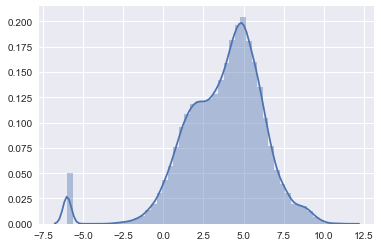

In [333]:
fpkm_df = pd.read_csv("../../Data/RNA-seq/iLoop_ChemTol-29251229_onlyCDS_noPseudo_wAttr_01_FPKM.txt", sep="\t")
del fpkm_df["tracking_id"]
del fpkm_df["gene_x"]
del fpkm_df["gene_synonym"]
del fpkm_df["gene_y"]
del fpkm_df["product"]
del fpkm_df["Note"]
del fpkm_df["pseudo"]
fpkm_df = fpkm_df.set_index("locus_tag")

fpkm_df = fpkm_df.transpose()

def extract_mutant(s):
    if s.startswith("old_MG1655"):
        return "old_MG1655"
    elif s.startswith("old_COUM"):
        return "old_COUM"
    else:
        return s.split("-")[0]
    
def extract_medium(s):
    s = s[:-3]
    s = s.split("-", 1)[1]
    if s.startswith("2-"):
        return s[2:]
    return s

fpkm_df["Mutant"] = fpkm_df.index.map(extract_mutant)
fpkm_df["Medium"] = fpkm_df.index.map(extract_medium)

fpkm_df = fpkm_df.groupby(["Mutant", "Medium"]).mean().transpose()
fpkm_df = fpkm_df[~(fpkm_df == 0).all(1)]
fpkm_df = np.log(fpkm_df + np.exp(-6))

sbn.distplot(fpkm_df.values.flatten())

fpkm_df = fpkm_df.transpose()

del fpkm_df["b0264"]

In [334]:
fpkm_df.index.get_level_values(0)

Index(['HEXA', 'HEXA', 'HMDA', 'HMDA', 'IBUA', 'IBUA', 'MG1655', 'MG1655',
       'MG1655', 'MG1655', 'MG1655', 'MG1655', 'OCTA', 'OCTA', 'PUTR', 'PUTR',
       'old_COUM', 'old_COUM', 'old_MG1655', 'old_MG1655'],
      dtype='object', name='Mutant')

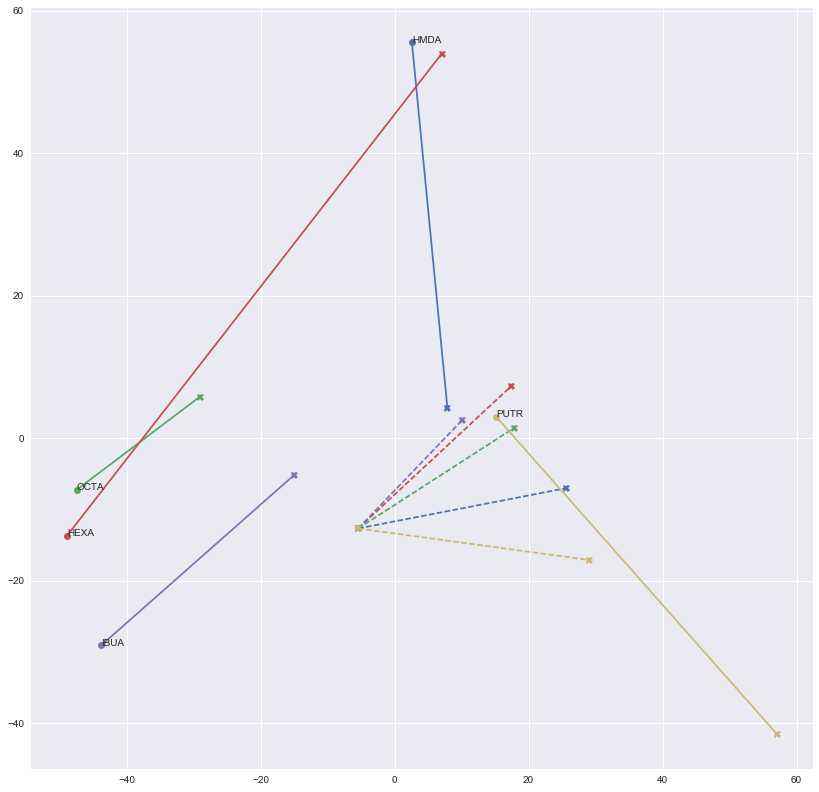

In [362]:
pca = PCA(5)
plot_df = fpkm_df.copy()
plot_df = plot_df[~plot_df.index.get_level_values(0).str.startswith("old")]
# plot_df = plot_df[~plot_df.index.get_level_values(0).isin(["PUTR", "HEXA"])]
plot_df = plot_df[[c for c in plot_df.columns if plot_df[c].std() != 0]]
plot_df = (plot_df - plot_df.mean()) / plot_df.std()
coords = pca.fit_transform(plot_df)

coord_df = pd.DataFrame(coords, index=plot_df.index)

palette = palettes.Category10_6
#colors = dict(zip(["HEXA"]))


# (0.2980392156862745, 0.4470588235294118, 0.6901960784313725),
# (0.3333333333333333, 0.6588235294117647, 0.40784313725490196),
# (0.7686274509803922, 0.3058823529411765, 0.3215686274509804),
# (0.5058823529411764, 0.4470588235294118, 0.6980392156862745),
# (0.8, 0.7254901960784313, 0.4549019607843137),

colors = {
    "HMDA": (0.2980392156862745, 0.4470588235294118, 0.6901960784313725),
    "OCTA": (0.3333333333333333, 0.6588235294117647, 0.40784313725490196),
    "HEXA": (0.7686274509803922, 0.3058823529411765, 0.3215686274509804),
    "IBUA": (0.5058823529411764, 0.4470588235294118, 0.6980392156862745),
    "PUTR": (0.8, 0.7254901960784313, 0.4549019607843137),
    "old_COUM": (0.39215686274509803, 0.7098039215686275, 0.803921568627451),
    "old_MG1655": (0, 0, 0)
}

tox_to_strain = {
    "HMDA": "HMDA", "Hexa-acid": "HEXA", "Isobut-acid": "IBUA", "Octa-acid": "OCTA", "Putrescine": "PUTR"
}

fig = plt.figure(figsize=[14, 14])
ax = fig.add_subplot(1, 1, 1)
for strain in set(coord_df.index.get_level_values(0)):
    if strain != "MG1655":
        strain_df = coord_df.loc[strain]
        m9_coords = strain_df[strain_df.index == "M9"].iloc[0]
        tox_coords = strain_df[strain_df.index != "M9"].iloc[0]
        line = ax.plot([m9_coords[0], tox_coords[0]], [m9_coords[1], tox_coords[1]], "-", color=colors[strain])
        ax.plot(m9_coords[0], m9_coords[1], "o", color=colors[strain])
        ax.text(m9_coords[0], m9_coords[1], strain)
        ax.plot(tox_coords[0], tox_coords[1], "X", color=colors[strain])
        # print(strain, line[0].get_color())
    else:
        strain_df = coord_df.loc[strain]
        m9_coords = strain_df[strain_df.index == "M9"].iloc[0]
        tox_df = strain_df[strain_df.index != "M9"]
        for tox, row in tox_df.iterrows():
            color = colors[tox_to_strain[tox]]
            plt.plot([m9_coords[0], row[0]], [m9_coords[1], row[1]], "--X", color=color)

# for (idx, row), coord_row in zip(fpkm_df.iterrows(), coords):
#     x, y = coord_row[:2]
#     if "MG1655" in idx[0]:
#         color = "black"
#         mrk = "X"
#     else:
#         mrk = "o"
#         color = "red"
#     plt.plot(x, y, mrk, markersize=10, color=color)
#     plt.text(x, y, idx[0] + "_" + idx[1])

plt.savefig("../../Plots/Draft_plots/RNA-seq_PCA_all_samples.png")

(0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
(0.3333333333333333, 0.6588235294117647, 0.40784313725490196)
(0.7686274509803922, 0.3058823529411765, 0.3215686274509804)
(0.5058823529411764, 0.4470588235294118, 0.6980392156862745)
(0.8, 0.7254901960784313, 0.4549019607843137)
(0.39215686274509803, 0.7098039215686275, 0.803921568627451)


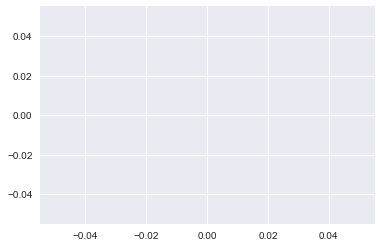

In [352]:
plt.figure()
for i in range(6):
    line = plt.plot([0, 0], [0, 0], "-")
    print(line[0].get_color())

In [359]:
pca.explained_variance_ratio_

array([ 0.22718116,  0.17046725,  0.13912269,  0.11811479,  0.09338625])

In [331]:
test_df = plot_df.transpose()
test_df[test_df.isnull().any(1)]

Mutant         HEXA     HMDA            IBUA     MG1655                        \
Medium    Hexa-acid  M9 HMDA  M9 Isobut-acid  M9   HMDA Hexa-acid Isobut-acid   
locus_tag                                                                       
b0264           NaN NaN  NaN NaN         NaN NaN    NaN       NaN         NaN   

Mutant                             OCTA           PUTR             
Medium     M9 Octa-acid Putrescine   M9 Octa-acid   M9 Putrescine  
locus_tag                                                          
b0264     NaN       NaN        NaN  NaN       NaN  NaN        NaN

In [321]:
for c in plot_df.columns:
    try:
        if plot_df[c].std() == 0:
            print(c)
    except ValueError:
        print(c)

In [194]:
dfs = {}
for f in f_list:
    df = pd.read_csv(data_dir + f, sep="\t")#.iloc[:, 5:8]
    df.index = df["DESCRIPTION"]
    mut_df = df[[c for c in df.columns if "M9" in c and not "MG1655" in c]].mean(1)
    wt_df = df[[c for c in df.columns if "M9" in c and "MG1655" in c]].mean(1)
    
    comp = f.split(".")[0].split("_")[-1]
    
    dfs[comp] = np.log(mut_df / wt_df)
    # dfs[comp] = np.log(mut_df)
    
    # assert len(mut_df.columns) == 3
    # assert len(wt_df.columns) == 3
    
    # dfs.append(df.transpose())

ok


/Users/krisj/anaconda/envs/cfb_old/lib/python3.4/site-packages/ipykernel/__main__.py:14: RuntimeWarning: divide by zero encountered in log


In [190]:
df = pd.DataFrame(dfs).replace([np.inf, -np.inf], np.nan)

In [157]:
df = pd.DataFrame()
df.index = df.index.map(lambda x: x[4:] if x.startswith("old_") else x)
df["compound"] = df.index.map(lambda x: x[:4])
df = df.groupby("compound").mean().transpose()
#df.columns = ["".join(c.split("-M9-")) for c in df.columns]

DataError: No numeric types to aggregate

In [158]:
from sklearn.decomposition import PCA

In [191]:
pca = PCA(5)

plot_df = df.dropna().transpose()
# plot_df = (plot_df - plot_df.mean()) / plot_df.std()

coords = pca.fit_transform(plot_df)

In [192]:
coords.shape

(6, 5)

[ 24.8980251  -26.54601906  25.46802302   1.56941585   1.74154313]
[-12.54178365  27.8517049   14.43331515   7.45296028 -11.51891921]
[-29.0250552  -16.11773953  -6.71808072 -16.18954981  -7.17857702]
[ 45.75507064   7.11769979 -21.6629328   -1.5713325   -4.07494489]
[ -5.64394384  22.31315792   4.10427151  -7.79606761  15.9157792 ]
[-23.44231304 -14.61880401 -15.62459615  16.53457379   5.1151188 ]


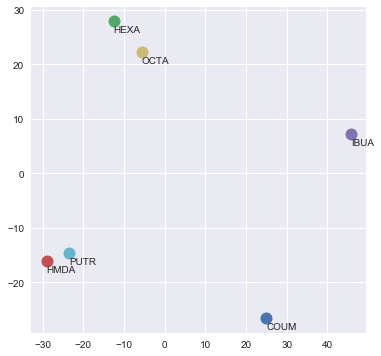

In [193]:
plt.figure(figsize=[6, 6])
for coord_row, name in zip(coords, df.columns):
    print(coord_row)
    plt.plot(coord_row[0], coord_row[1], "o", label=name, markersize=12)
    plt.text(coord_row[0], coord_row[1]-2, name)
    
#plt.legend()

plt.savefig("../../Plots/Draft_plots/M9_RNA-seq_PCA.png")

In [174]:
pca.explained_variance_ratio_

array([ 0.37018472,  0.24393601,  0.17599263,  0.13011996,  0.07976668])

In [58]:
pd.read_csv(data_dir + f_list[0], sep="\t")

NAME DESCRIPTION  PUTR-Putrescine-_1  PUTR-Putrescine-_2  \
0     thrL       b0001         3493.640000        17745.900000   
1     rnhB       b0183          238.622000          271.318000   
2     yedL       b1932           17.371800           14.137200   
3     intG       b1936            0.000000            0.000000   
4     fliH       b1940            1.817870            1.701040   
5     fliF       b1938            0.692215            0.309717   
6     fliG       b1939            2.414570            3.288190   
7     fliI       b1941            0.322804            0.749688   
8     fliK       b1943            0.569585            0.726844   
9     fliJ       b1942            0.000000            0.000000   
10    fliL       b1944            0.649626            3.704390   
11    fliN       b1946            0.547836            1.096080   
12    lpxB       b0182          407.539000          409.581000   
13    fliM       b1945            1.273340            1.995430   
14    fliP       b1948            1.210800            0.275430   
15    fliO       b1947            0.000000            0.956699   
16    fliQ       b1949            2.987790            2.838040   
17    fliR       b1950            0.930212            0.000000   
18    rcsA       b1951          157.921000          103.351000   
19    yodD       b1953          599.076000          442.505000   
20    yedP       b1955          142.737000          178.253000   
21    yedA       b1959            2.956050            1.097000   
22    yedS       b4496            0.000000            0.000000   
23    lpxA       b0181          675.579000          733.983000   
24    hchA       b1967          524.564000          561.678000   
25    hiuH       b1970           20.217400           22.100800   
26    yedY       b1971           26.913000           29.858000   
27    yedZ       b1972           12.801100           11.288200   
28    zinT       b1973           41.011700           34.024200   
29    yodB       b1974            2.123990            4.088010   
...    ...         ...                 ...                 ...   
4210  yobB       b1843           19.010000           23.931200   
4211  exoX       b1844          113.215000           89.315200   
4212  purT       b1849           21.626400           10.444500   
4213  yebK       b1853           57.530200           56.557700   
4214  pykA       b1854          475.481000          432.116000   
4215  znuB       b1859           28.930200           31.796200   
4216  znuC       b1858           41.172300           44.360600   
4217  yebB       b1862            2.318600            1.789300   
4218  lpxD       b0179         1248.280000         1201.290000   
4219  yecE       b1868          109.216000           93.486400   
4220  yecD       b1867          336.818000          312.891000   
4221  yecN       b1869          109.166000           83.679900   
4222  cmoB       b1871           76.447600           59.809400   
4223  cmoA       b1870           93.264400           80.958200   
4224  argS       b1876          132.050000          120.363000   
4225  yecT       b1877            4.027160            4.903750   
4226  uspC       b1895           16.690400           22.993900   
4227  ftnB       b1902           61.337300           78.642700   
4228  yecR       b1904            0.000000            6.111180   
4229  fabZ       b0180         1152.070000         1688.260000   
4230  ftnA       b1905           84.873700           99.591400   
4231  tyrP       b1907           16.420400           14.716600   
4232  yecF       b1915          106.193000          124.827000   
4233  fliD       b1924            1.258970            2.727730   
4234  fliT       b1926            3.754240            0.709936   
4235  fliS       b1925            3.290340            0.532318   
4236  amyA       b1927          127.996000          138.835000   
4237  yedF       b1930          146.278000          174.471000   
4238  yedE       b1929          110.953000    

In [109]:
m9_df = pd.read_csv("../Data/Growth_data/M9/M9_normalised_growth.csv")#.groupby("strain").mean()

In [108]:
for s in ["COUM4-2", "HEXA4-10", "HMDA7-1", "IBUA8-3", "OCTA1-9", "PUTR8-10"]:
    print(s, m9_df.loc[s]["growth_rate"])

COUM4-2 0.46366962252
HEXA4-10 0.790164207615
HMDA7-1 0.803854661226
IBUA8-3 1.084390945
OCTA1-9 0.948926714835
PUTR8-10 0.71958613323


In [111]:
m9_df[m9_df["growth_rate"]== 0]

evolved_compound grown_compound   strain  repl  growth_rate  \
338        coumarate             M9  COUM7-9     1          0.0   

     rel_growth_rate  growth_ratio exp_name  
338        -0.525278           0.0     COUM

In [113]:
pca.components_[0]

array([ 0.00593718, -0.05053389, -0.02805286, ..., -0.05828627,
       -0.05760608, -0.05226387])

In [296]:
rna_seq_strains = ["COUM4-2", "HEXA4-10", "HMDA7-1", "IBUA8-3", "OCTA1-9", "PUTR8-10", "23BD7-5"]
rna_seq_growth_df = raw_growth_df.reindex(rna_seq_strains)
rna_seq_growth_df["M9"] = m9_df["growth_rate"]

rel_rna_seq_growth_df = growth_df.reindex(rna_seq_strains)
rel_rna_seq_growth_df["M9"] = m9_df["rel_growth_rate"]

In [297]:
rel_rna_seq_growth_df

grown_compound  1,2-propanediol  2,3-butanediol      HMDA      NaCl   adipate  \
strain                                                                          
COUM4-2               -0.154049       -0.191839 -0.217277 -0.124401 -0.042851   
HEXA4-10               0.007782       -0.008426  0.066412 -0.063613 -0.050449   
HMDA7-1                0.013296       -0.045514  0.221063  0.156092  0.208658   
IBUA8-3                0.100507        0.066255  0.026338  0.119473  0.066597   
OCTA1-9               -0.190476       -0.157570 -0.217765 -0.057685 -0.110733   
PUTR8-10              -0.121266       -0.079617  0.332389 -0.003712  0.014782   
23BD7-5                0.142574        0.284142 -0.002505 -0.018733 -0.108424   

grown_compound   butanol  coumarate  glutarate  hexanoate  isobutyrate  \
strain                                                                   
COUM4-2        -0.005534   0.173411   0.014899   0.012834    -0.105121   
HEXA4-10       -0.338106   0.304509   0.012572   0.183514    -0.106628   
HMDA7-1        -0.477218   0.257742   0.215233   0.073109    -0.062922   
IBUA8-3         0.194569   0.282910   0.095119  -0.229266     0.218013   
OCTA1-9        -0.505253   0.266614  -0.075553   0.052184    -0.132133   
PUTR8-10       -0.197883   0.108541   0.056612   0.028207    -0.177515   
23BD7-5         0.205462   0.068475  -0.121588   0.011807    -0.035103   

grown_compound  octanoate  putrescine compound        M9  
strain                                                    
COUM4-2         -0.242950   -0.275832     COUM -0.061608  
HEXA4-10         0.004462   -0.006475     HEXA  0.061168  
HMDA7-1          0.218425    0.118520     HMDA  0.004365  
IBUA8-3         -0.013743    0.024023     IBUA  0.308028  
OCTA1-9         -0.028941   -0.203813     OCTA  0.258542  
PUTR8-10         0.058073    0.189843     PUTR -0.011890  
23BD7-5          0.240797   -0.045063     23BD  0.119456

In [303]:
for strain in rna_seq_strains:
    print(strain, *strains_to_muts[strain], sep="\t")

COUM4-2	DUP-3361691-5,246_3.9	DUP-3316547-45,140_2.2	SNP-4375431-C	SNP-4627567-T	SNP-3473615-T	SNP-3440924-G	SNP-2141832-T	DUP-3367122-31,895_2.2
HEXA4-10	MOB-1293196-IS5-4	SNP-1915353-C	INS-3536332-T	SNP-3440923-T
HMDA7-1	DEL-2104077-1	SNP-3377173-C	SNP-3473612-C	SNP-3317072-C
IBUA8-3	SNP-87381-T	DEL-1995819-40006	SNP-3725175-G	INS-1756495-A	DEL-3815859-82
OCTA1-9	DEL-1198498-8	SNP-3440923-T	SNP-1356297-T	SNP-3400673-C
PUTR8-10	DEL-700785-47	SNP-3473612-C	SNP-3318960-A	SNP-562667-C	DEL-3815808-1	SNP-3823811-A	INS-2807248-T	SNP-3400195-A
23BD7-5	MOB-1931499-IS5-4	MOB-998719-IS2-5	INS-484102-AT	SNP-3369969-A	SNP-4128386-C	DEL-2911491-7528	SNP-4186152-G	SNP-2073463-A
